Objective of the Notebook

Objective of this notebook is to study COVID-19 outbreak with the help of some basic visualizations techniques. Comparison of China where the COVID-19 originally originated from with the Rest of the World. Perform predictions and Time Series forecasting in order to study the impact and spread of the COVID-19 in comming days

<h2>importing important libraries</h2>

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
from datetime import timedelta
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score
import statsmodels.api as sm
#from statsmodels.tsa.api import Holt,SimpleExpSmoothing,ExponentialSmoothing
#from fbprophet import Prophet
#from sklearn.preprocessing import PolynomialFeatures
#from statsmodels.tsa.stattools import adfuller
#!pip install pyramid-arima
#from pmdarima import auto_arima
#from statsmodels.tsa.arima_model import ARIMA
#from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
std=StandardScaler()

In [2]:
#from fbprophet import Prophet

In [2]:
import os
os.getcwd()

'/home/vishal/Desktop/covid paper'

In [4]:
#read data
covid=pd.read_csv("covid_19_data.csv")
covid.head(100)


,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
5,6,01/22/2020,Guangdong,Mainland China,1/22/2020 17:00,26.0,0.0,0.0
6,7,01/22/2020,Guangxi,Mainland China,1/22/2020 17:00,2.0,0.0,0.0
7,8,01/22/2020,Guizhou,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
8,9,01/22/2020,Hainan,Mainland China,1/22/2020 17:00,4.0,0.0,0.0
9,10,01/22/2020,Hebei,Mainland China,1/22/2020 17:00,1.0,0.0,0.0


In [5]:
print("Shape of the dataset: ",covid.shape)
print("Checking for null values:\n",covid.isnull().sum())
print("Checking Data-type of each column:\n",covid.dtypes)

Shape of the dataset:  (40805, 8)
Checking for null values:
 SNo                    0
ObservationDate        0
Province/State     18015
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64
Checking Data-type of each column:
 SNo                  int64
ObservationDate     object
Province/State      object
Country/Region      object
Last Update         object
Confirmed          float64
Deaths             float64
Recovered          float64
dtype: object


In [6]:
covid.drop('SNo',axis=1,inplace=True) #as it does not affect our forecast

In [7]:
covid["ObservationDate"]=pd.to_datetime(covid["ObservationDate"])

<h2>Datewise analysis</h2>

In [8]:
datewise = covid.groupby(['ObservationDate']).agg({'Confirmed':'sum','Deaths':'sum','Recovered':'sum'})
#print(datewise.head())
datewise["Days Since"]=datewise.index-datewise.index.min()
print(datewise.head())

                 Confirmed  Deaths  Recovered Days Since
ObservationDate                                         
2020-01-22           555.0    17.0       28.0     0 days
2020-01-23           653.0    18.0       30.0     1 days
2020-01-24           941.0    26.0       36.0     2 days
2020-01-25          1438.0    42.0       39.0     3 days
2020-01-26          2118.0    56.0       52.0     4 days


In [8]:
datewise.iloc[[0],[1]]

,Deaths
ObservationDate,
2020-01-22,17.0


In [9]:
print("Basic Information")
print("Totol number of countries with Disease Spread: ",len(covid["Country/Region"].unique()))
print("Total number of Confirmed Cases around the World: ",datewise["Confirmed"].iloc[-1])
print("Total number of Recovered Cases around the World: ",datewise["Recovered"].iloc[-1])
print("Total number of Deaths Cases around the World: ",datewise["Deaths"].iloc[-1])
print("Total number of Active Cases around the World: ",(datewise["Confirmed"].iloc[-1]-datewise["Recovered"].iloc[-1]-datewise["Deaths"].iloc[-1]))
print("Total number of Closed Cases around the World: ",datewise["Recovered"].iloc[-1]+datewise["Deaths"].iloc[-1])
print("Approximate number of Confirmed Cases per Day around the World: ",np.round(datewise["Confirmed"].iloc[-1]/datewise.shape[0]))
print("Approximate number of Recovered Cases per Day around the World: ",np.round(datewise["Recovered"].iloc[-1]/datewise.shape[0]))
print("Approximate number of Death Cases per Day around the World: ",np.round(datewise["Deaths"].iloc[-1]/datewise.shape[0]))
print("Approximate number of Confirmed Cases per hour around the World: ",np.round(datewise["Confirmed"].iloc[-1]/((datewise.shape[0])*24)))
print("Approximate number of Recovered Cases per hour around the World: ",np.round(datewise["Recovered"].iloc[-1]/((datewise.shape[0])*24)))
print("Approximate number of Death Cases per hour around the World: ",np.round(datewise["Deaths"].iloc[-1]/((datewise.shape[0])*24)))
print("Number of Confirmed Cases in last 24 hours: ",datewise["Confirmed"].iloc[-1]-datewise["Confirmed"].iloc[-2])
print("Number of Recovered Cases in last 24 hours: ",datewise["Recovered"].iloc[-1]-datewise["Recovered"].iloc[-2])
print("Number of Death Cases in last 24 hours: ",datewise["Deaths"].iloc[-1]-datewise["Deaths"].iloc[-2])

Basic Information
Totol number of countries with Disease Spread:  223
Total number of Confirmed Cases around the World:  7632802.0
Total number of Recovered Cases around the World:  3613277.0
Total number of Deaths Cases around the World:  425394.0
Total number of Active Cases around the World:  3594131.0
Total number of Closed Cases around the World:  4038671.0
Approximate number of Confirmed Cases per Day around the World:  53376.0
Approximate number of Recovered Cases per Day around the World:  25268.0
Approximate number of Death Cases per Day around the World:  2975.0
Approximate number of Confirmed Cases per hour around the World:  2224.0
Approximate number of Recovered Cases per hour around the World:  1053.0
Approximate number of Death Cases per hour around the World:  124.0
Number of Confirmed Cases in last 24 hours:  118321.0
Number of Recovered Cases in last 24 hours:  72581.0
Number of Death Cases in last 24 hours:  3936.0


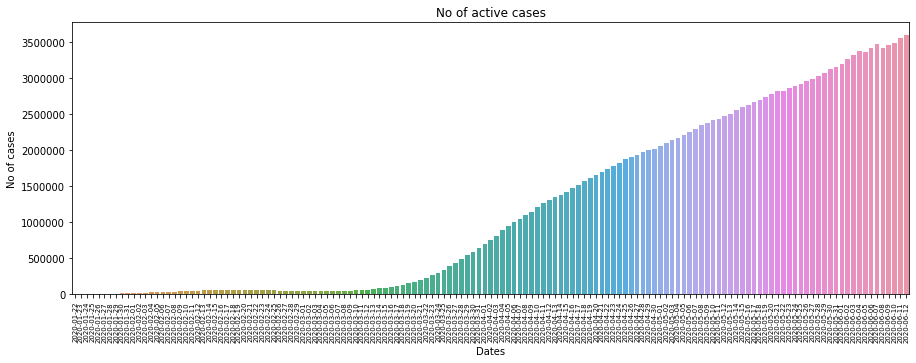

In [10]:
plt.figure(figsize=(15,5))
sns.barplot(x=datewise.index.date, y=datewise["Confirmed"]-datewise["Recovered"]-datewise["Deaths"])
plt.title("No of active cases")
plt.xticks(rotation=90)
plt.xlabel("Dates")
plt.ylabel("No of cases")
plt.tick_params(axis='x', which='major', labelsize=7)

#plt.tight_layout()


Increase in number of Active Cases is probably an indication of Recovered case or Death case number is dropping in comparison to number of Confirmed Cases drastically. Will look for the conclusive evidence for the same in the notebook ahead.

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142]),
 <a list of 143 Text xticklabel objects>)

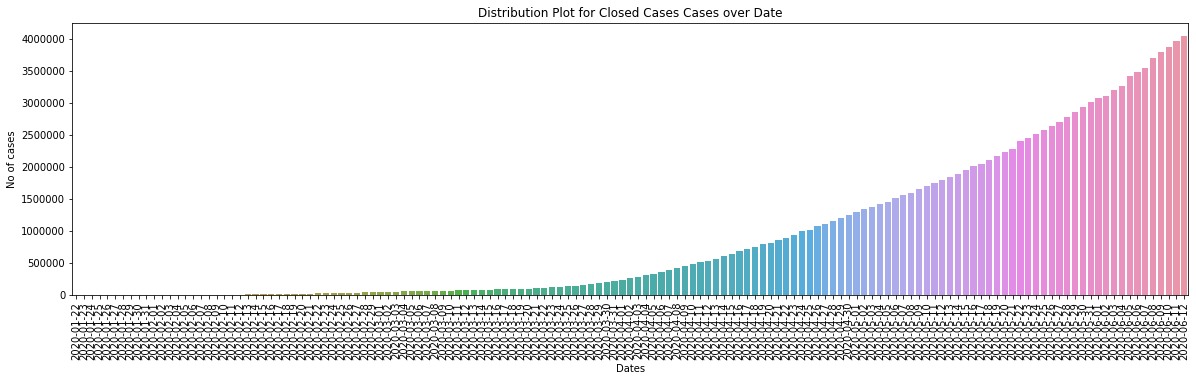

In [11]:
plt.figure(figsize=(20,5))
sns.barplot(x=datewise.index.date, y=datewise["Recovered"]+datewise["Deaths"])
plt.title("Distribution Plot for Closed Cases Cases over Date")
plt.xlabel("Dates")
plt.ylabel("No of cases")
plt.xticks(rotation=90)
#plt.tick_params(axis='x', which='major', labelsize=7)


Closed Cases = Number of Recovered Cases + Number of Death Cases

Increase in number of Closed classes imply either more patients are getting recovered from the disease or more pepole are dying because of COVID-19

                 Confirmed    Deaths  Recovered Days Since  WeekOfYear
ObservationDate                                                       
2020-06-08       7119002.0  406543.0  3293408.0   138 days          24
2020-06-09       7242313.0  411436.0  3375673.0   139 days          24
2020-06-10       7360239.0  416201.0  3454807.0   140 days          24
2020-06-11       7514481.0  421458.0  3540696.0   141 days          24
2020-06-12       7632802.0  425394.0  3613277.0   142 days          24


<function matplotlib.pyplot.xlabel(xlabel, fontdict=None, labelpad=None, **kwargs)>

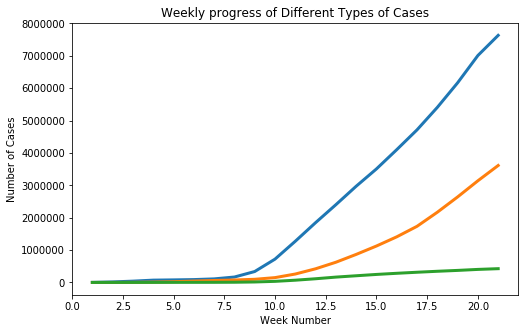

In [12]:
datewise["WeekOfYear"]=datewise.index.weekofyear

print(datewise.tail())

week_num=[]
weekwise_confirmed=[]
weekwise_recovered=[]
weekwise_deaths=[]
w=1
for i in list(datewise["WeekOfYear"].unique()):
    weekwise_confirmed.append(datewise[datewise["WeekOfYear"]==i]["Confirmed"].iloc[-1])
    weekwise_recovered.append(datewise[datewise["WeekOfYear"]==i]["Recovered"].iloc[-1])
    weekwise_deaths.append(datewise[datewise["WeekOfYear"]==i]["Deaths"].iloc[-1])
    week_num.append(w)
    w=w+1

plt.figure(figsize=(8,5))
plt.plot(week_num,weekwise_confirmed,linewidth=3)
plt.plot(week_num,weekwise_recovered,linewidth=3)
plt.plot(week_num,weekwise_deaths,linewidth=3)
plt.ylabel("Number of Cases")
plt.xlabel("Week Number")
plt.title("Weekly progress of Different Types of Cases")
plt.xlabel

In [13]:
pd.Series([1,2,3,4]).diff()

0    NaN
1    1.0
2    1.0
3    1.0
dtype: float64

Text(0.5, 1.0, 'Weekly increase in Number of Death Cases')

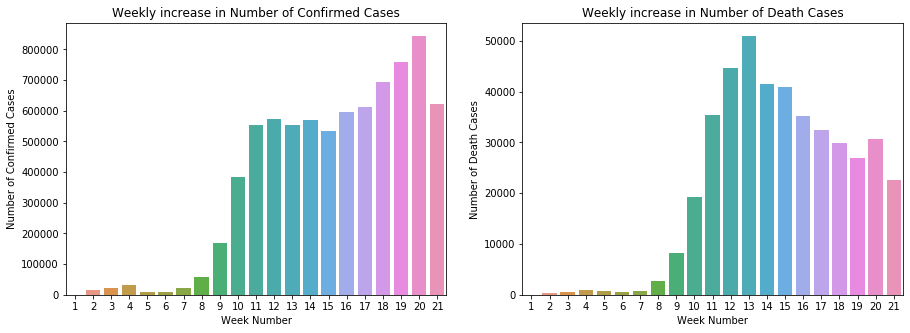

In [14]:
fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(15,5))
sns.barplot(x=week_num,y=pd.Series(weekwise_confirmed).diff().fillna(0),ax=ax1)
sns.barplot(x=week_num,y=pd.Series(weekwise_deaths).diff().fillna(0),ax=ax2)
ax1.set_xlabel("Week Number")
ax2.set_xlabel("Week Number")
ax1.set_ylabel("Number of Confirmed Cases")
ax2.set_ylabel("Number of Death Cases")
ax1.set_title("Weekly increase in Number of Confirmed Cases")
ax2.set_title("Weekly increase in Number of Death Cases")

weekly death rate is increasing as you can see in 15 and 16 th week

<h2>Growth rate of Confirmed, Recovered and Death Cases</h2>

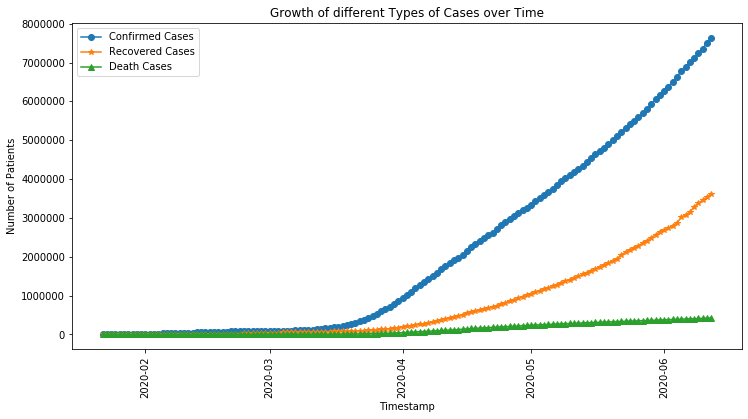

In [15]:
plt.figure(figsize=(12,6))
plt.plot(datewise["Confirmed"],marker="o",label="Confirmed Cases")
plt.plot(datewise["Recovered"],marker="*",label="Recovered Cases")
plt.plot(datewise["Deaths"],marker="^",label="Death Cases")
plt.ylabel("Number of Patients")
plt.xlabel("Timestamp")
plt.xticks(rotation=90)
plt.title("Growth of different Types of Cases over Time")
plt.legend()

Average Mortality Rate 4.845127155765457
Median Mortality Rate 5.228742044580939
Average Recovery Rate 29.463420014532343
Median Recovery Rate 30.10221672046206


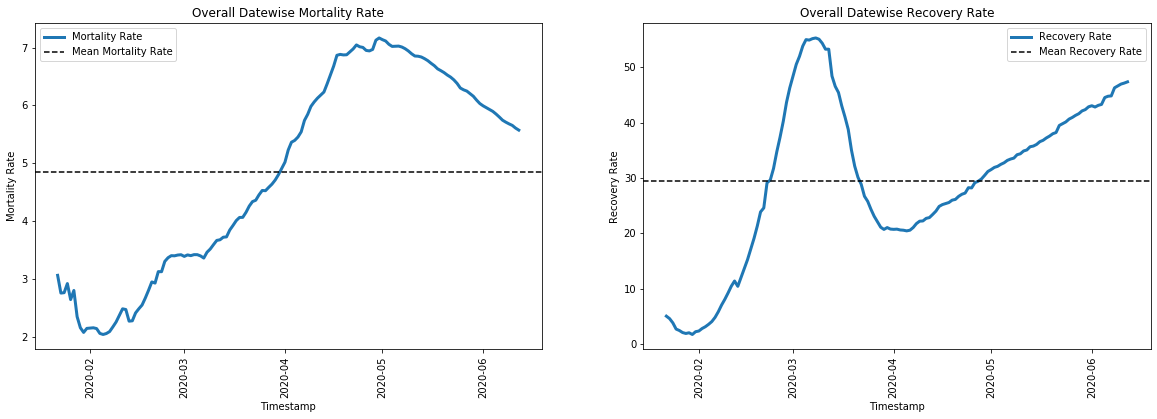

In [16]:
#Calculating the Mortality Rate and Recovery Rate
datewise["Mortality Rate"]=(datewise["Deaths"]/datewise["Confirmed"])*100
datewise["Recovery Rate"]=(datewise["Recovered"]/datewise["Confirmed"])*100
datewise["Active Cases"]=datewise["Confirmed"]-datewise["Recovered"]-datewise["Deaths"]
datewise["Closed Cases"]=datewise["Recovered"]+datewise["Deaths"]

#Plotting Mortality and Recovery Rate 
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,6))
ax1.plot(datewise["Mortality Rate"],label='Mortality Rate',linewidth=3)
ax1.axhline(datewise["Mortality Rate"].mean(),linestyle='--',color='black',label="Mean Mortality Rate")
ax1.set_ylabel("Mortality Rate")
ax1.set_xlabel("Timestamp")
ax1.set_title("Overall Datewise Mortality Rate")
ax1.legend()
for tick in ax1.get_xticklabels():
    tick.set_rotation(90)
ax2.plot(datewise["Recovery Rate"],label="Recovery Rate",linewidth=3)
ax2.axhline(datewise["Recovery Rate"].mean(),linestyle='--',color='black',label="Mean Recovery Rate")
ax2.set_ylabel("Recovery Rate")
ax2.set_xlabel("Timestamp")
ax2.set_title("Overall Datewise Recovery Rate")
ax2.legend()
for tick in ax2.get_xticklabels():
    tick.set_rotation(90)
    
print("Average Mortality Rate",datewise["Mortality Rate"].mean())
print("Median Mortality Rate",datewise["Mortality Rate"].median())
print("Average Recovery Rate",datewise["Recovery Rate"].mean())
print("Median Recovery Rate",datewise["Recovery Rate"].median())


Mortality rate = (Number of Death Cases / Number of Confirmed Cases) x 100

Recovery Rate= (Number of Recoverd Cases / Number of Confirmed Cases) x 100

Mortality rate is showing a significant dip since past few days, which is a positive sign.

Recovery Rate has started to pick up again which is a good sign, another supportive reason to why number of Closed Cases are increasing

Average increase in number of Confirmed Cases every day:  53372.0
Average increase in number of Recovered Cases every day:  25267.0
Average increase in number of Deaths Cases every day:  2975.0


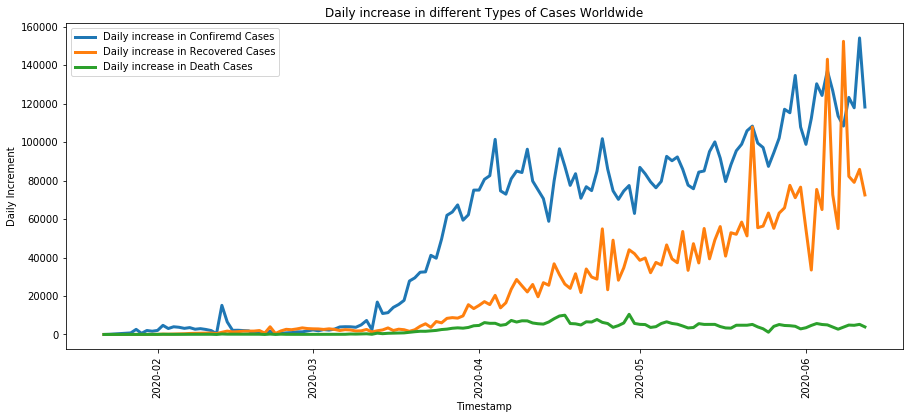

In [17]:
print("Average increase in number of Confirmed Cases every day: ",np.round(datewise["Confirmed"].diff().fillna(0).mean()))
print("Average increase in number of Recovered Cases every day: ",np.round(datewise["Recovered"].diff().fillna(0).mean()))
print("Average increase in number of Deaths Cases every day: ",np.round(datewise["Deaths"].diff().fillna(0).mean()))

plt.figure(figsize=(15,6))
plt.plot(datewise["Confirmed"].diff().fillna(0),label="Daily increase in Confiremd Cases",linewidth=3)
plt.plot(datewise["Recovered"].diff().fillna(0),label="Daily increase in Recovered Cases",linewidth=3)
plt.plot(datewise["Deaths"].diff().fillna(0),label="Daily increase in Death Cases",linewidth=3)
plt.xlabel("Timestamp")
plt.ylabel("Daily Increment")
plt.title("Daily increase in different Types of Cases Worldwide")
plt.xticks(rotation=90)
plt.legend()

Growth Factor

Growth factor is the factor by which a quantity multiplies itself over time. The formula used is:

Formula: Every day's new (Confirmed,Recovered,Deaths) / new (Confirmed,Recovered,Deaths) on the previous day.

A growth factor above 1 indicates an increase correspoding cases.

A growth factor above 1 but trending downward is a positive sign, whereas a growth factor constantly above 1 is the sign of exponential growth.

A growth factor constant at 1 indicates there is no change in any kind of cases.



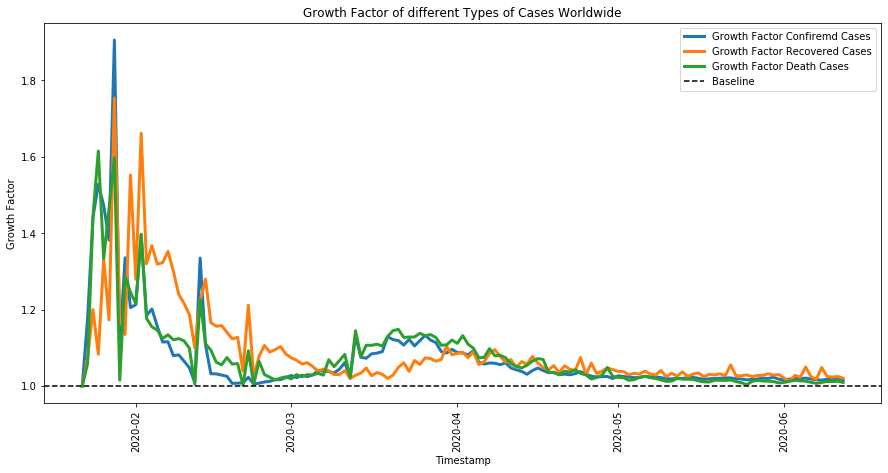

In [18]:
daily_increase_confirm=[]
daily_increase_recovered=[]
daily_increase_deaths=[]
for i in range(datewise.shape[0]-1):
    daily_increase_confirm.append(((datewise["Confirmed"].iloc[i+1]/datewise["Confirmed"].iloc[i])))
    daily_increase_recovered.append(((datewise["Recovered"].iloc[i+1]/datewise["Recovered"].iloc[i])))
    daily_increase_deaths.append(((datewise["Deaths"].iloc[i+1]/datewise["Deaths"].iloc[i])))
daily_increase_confirm.insert(0,1)
daily_increase_recovered.insert(0,1)
daily_increase_deaths.insert(0,1)

plt.figure(figsize=(15,7))
plt.plot(datewise.index,daily_increase_confirm,label="Growth Factor Confiremd Cases",linewidth=3)
plt.plot(datewise.index,daily_increase_recovered,label="Growth Factor Recovered Cases",linewidth=3)
plt.plot(datewise.index,daily_increase_deaths,label="Growth Factor Death Cases",linewidth=3)
plt.xlabel("Timestamp")
plt.ylabel("Growth Factor")
plt.title("Growth Factor of different Types of Cases Worldwide")
plt.axhline(1,linestyle='--',color='black',label="Baseline")
plt.xticks(rotation=90)
plt.legend()

Growth Factor constantly above 1 is an clear indication of Exponential increase in all form of cases.¶


<h1>Countrywise Analysis</h1>

In [19]:
countrywise=covid[covid["ObservationDate"]==covid["ObservationDate"].max()].groupby(["Country/Region"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'}).sort_values(["Confirmed"],ascending=False)
countrywise["Mortality"]=(countrywise["Deaths"]/countrywise["Confirmed"])*100
countrywise["Recovery"]=(countrywise["Recovered"]/countrywise["Confirmed"])*100
countrywise.head()

,Confirmed,Recovered,Deaths,Mortality,Recovery
Country/Region,,,,,
US,2048986.0,547386.0,114669.0,5.596378,26.714970
Brazil,828810.0,445123.0,41828.0,5.046754,53.706278
Russia,510761.0,268862.0,6705.0,1.312747,52.639493
India,297535.0,147195.0,8498.0,2.856135,49.471491
UK,294402.0,1282.0,41566.0,14.118790,0.435459


Text(0.5, 1.0, 'Top 15 countries as per Number of Death Cases')

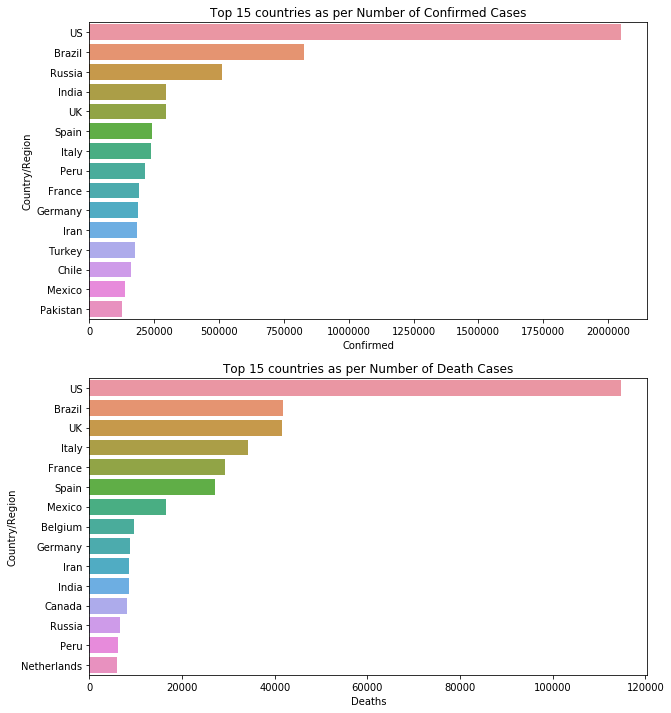

In [20]:
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(10,12))
top_15_confirmed=countrywise.sort_values(["Confirmed"],ascending=False).head(15)
top_15_deaths=countrywise.sort_values(["Deaths"],ascending=False).head(15)
sns.barplot(x=top_15_confirmed["Confirmed"],y=top_15_confirmed.index,ax=ax1)
ax1.set_title("Top 15 countries as per Number of Confirmed Cases")
sns.barplot(x=top_15_deaths["Deaths"],y=top_15_deaths.index,ax=ax2)
ax2.set_title("Top 15 countries as per Number of Death Cases")


Tourist Data: https://worldpopulationreview.com/countries/most-visited-countries/

International Students Data: https://www.easyuni.com/advice/top-countries-with-most-international-students-1184/

If we check the list of countries in accordance to number tourists visiters from link mentioned above, Top countries are mainly France, Spain, USA, China, Italy, Mexico, UK, Turkey, Germany, Thailand. Another thing to take into account most of the countries mentioned above also have highest number of International Students. All of the them are the most affected countries because of COVID-19

Another interesting thing to see is the median age of worst affected countries.
We can check that here Countrywise Median Age: https://ourworldindata.org/age-structure

<h3>Top 15 Countries as per Mortatlity Rate and Recovery Rate with more than 500 Confirmed Cases</h3>

In [21]:
countrywise_plot_mortal=countrywise[countrywise["Confirmed"]>500].sort_values(["Mortality"],ascending=False).tail(15)

countrywise_plot_mortal

,Confirmed,Recovered,Deaths,Mortality,Recovery
Country/Region,,,,,
Guinea,4426.0,3106.0,24.0,0.542250,70.176231
Kazakhstan,13872.0,8829.0,70.0,0.504614,63.646194
Oman,21071.0,7489.0,96.0,0.455602,35.541740
Ghana,10856.0,3921.0,48.0,0.442152,36.118276
Maldives,2003.0,1193.0,8.0,0.399401,59.560659
Mozambique,509.0,145.0,2.0,0.392927,28.487230
Rwanda,510.0,321.0,2.0,0.392157,62.941176
Uzbekistan,4869.0,3758.0,19.0,0.390224,77.182173
Hong Kong,1108.0,1060.0,4.0,0.361011,95.667870


Text(0.5, 0, 'Recovery (in Percentage)')

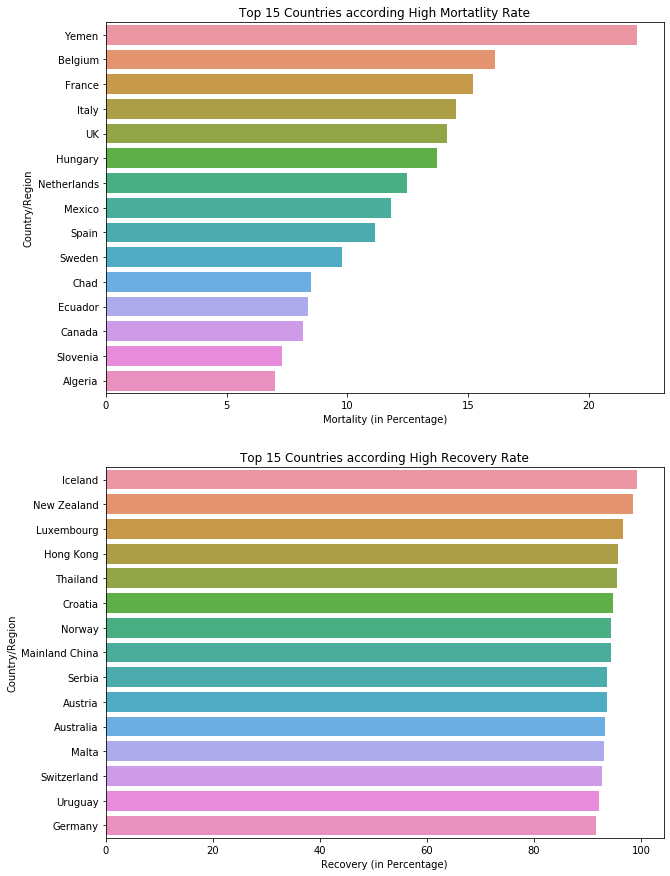

In [22]:
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(10,15))
countrywise_plot_mortal=countrywise[countrywise["Confirmed"]>500].sort_values(["Mortality"],ascending=False).head(15)
sns.barplot(x=countrywise_plot_mortal["Mortality"],y=countrywise_plot_mortal.index,ax=ax1)
ax1.set_title("Top 15 Countries according High Mortatlity Rate")
ax1.set_xlabel("Mortality (in Percentage)")
countrywise_plot_recover=countrywise[countrywise["Confirmed"]>500].sort_values(["Recovery"],ascending=False).head(15)
sns.barplot(x=countrywise_plot_recover["Recovery"],y=countrywise_plot_recover.index, ax=ax2)
ax2.set_title("Top 15 Countries according High Recovery Rate")
ax2.set_xlabel("Recovery (in Percentage)")

Text(0.5,0,'Recovery (in Percentage)')

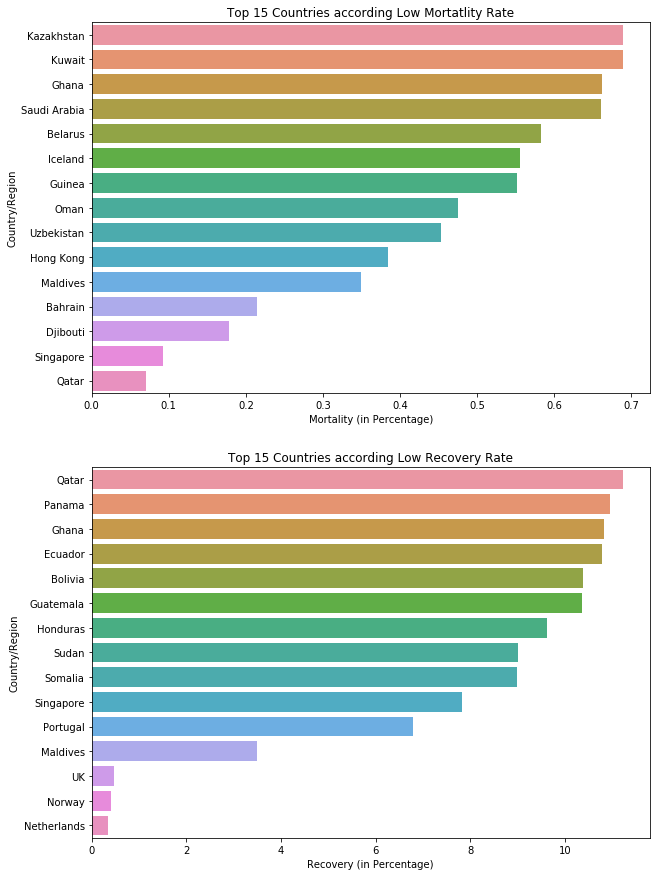

In [23]:
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(10,15))
countrywise_plot_mortal=countrywise[countrywise["Confirmed"]>500].sort_values(["Mortality"],ascending=False).tail(15)
sns.barplot(x=countrywise_plot_mortal["Mortality"],y=countrywise_plot_mortal.index,ax=ax1)
ax1.set_title("Top 15 Countries according Low Mortatlity Rate")
ax1.set_xlabel("Mortality (in Percentage)")
countrywise_plot_recover=countrywise[countrywise["Confirmed"]>500].sort_values(["Recovery"],ascending=False).tail(15)
sns.barplot(x=countrywise_plot_recover["Recovery"],y=countrywise_plot_recover.index, ax=ax2)
ax2.set_title("Top 15 Countries according Low Recovery Rate")
ax2.set_xlabel("Recovery (in Percentage)")

<h2>No Recovered Patients with considerable Mortality Rate</h2>

In [23]:
no_recovered_countries=countrywise[(countrywise["Recovered"]==0)][["Confirmed","Deaths"]]
no_recovered_countries["Mortality Rate"]=(no_recovered_countries["Deaths"]/no_recovered_countries["Confirmed"])*100
no_recovered_countries=no_recovered_countries[no_recovered_countries["Mortality Rate"]>0].sort_values(["Mortality Rate"],ascending=False)
no_recovered_countries.style.background_gradient('Reds')

,Confirmed,Deaths,Mortality Rate
Country/Region,,,
MS Zaandam,9,2,22.2222
Sweden,49684,4854,9.76974


Serbia was a country which had more than 50 Confirmed Cases with no Recovered patient for a very long time. Right now above 

countries have No Recovered Patients, but comparitively low number of Confirmed Cases



<h3>Countries with more than 100 Confirmed Cases and No Deaths with considerably high Recovery Rate</h3>

In [24]:
no_deaths=countrywise[(countrywise["Confirmed"]>100)&(countrywise["Deaths"]==0)]
no_deaths=no_deaths[no_deaths["Recovery"]>0].sort_values(["Recovery"],ascending=False).drop(["Mortality"],1)
no_deaths.style.background_gradient(cmap="autumn")

,Confirmed,Recovered,Deaths,Recovery
Country/Region,,,,
Cambodia,126,125,0,99.2063
Vietnam,333,323,0,96.997
Mongolia,197,95,0,48.2234
Uganda,686,161,0,23.4694


Vietnam has able to contain COVID-19 pretty well with no Deaths recorded so far with pretty healthy Recovery Rate. Just for information Vietnam was the first country to inform World Health Organization about Human to Human Transmission of COVID-19.

Vietnam and Cambodia will soon be free from COVID-19.

All the above countries are showing amazing recovery rate as well and will be fully completely get over COVID-19 very soon.

Text(0.5, 1.0, 'Top 15 Countries with Most Number of Closed Cases')

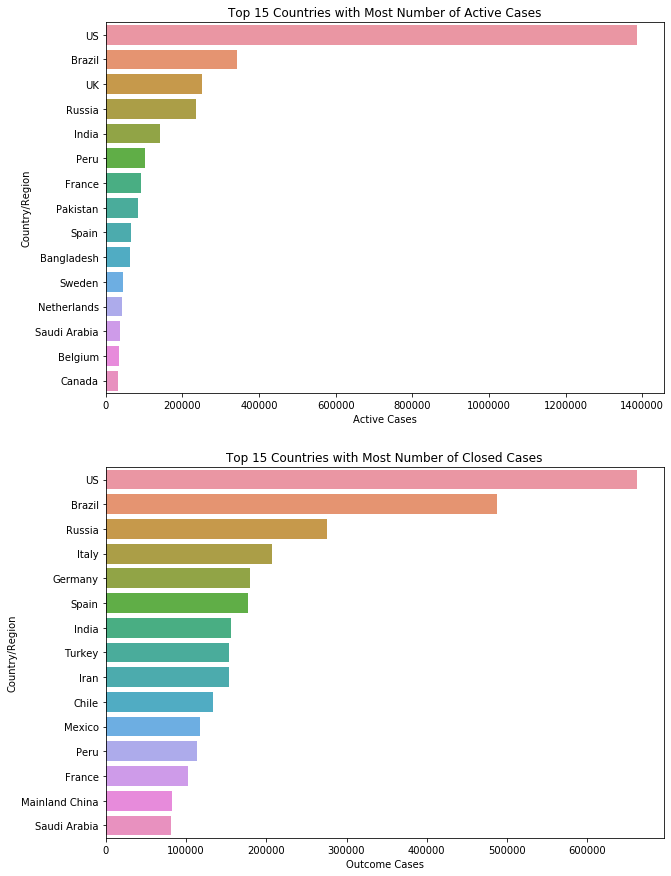

In [25]:
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(10,15))
countrywise["Active Cases"]=(countrywise["Confirmed"]-countrywise["Recovered"]-countrywise["Deaths"])
countrywise["Outcome Cases"]=(countrywise["Recovered"]+countrywise["Deaths"])
top_15_active=countrywise.sort_values(["Active Cases"],ascending=False).head(15)
top_15_outcome=countrywise.sort_values(["Outcome Cases"],ascending=False).head(15)
sns.barplot(x=top_15_active["Active Cases"],y=top_15_active.index,ax=ax1)
sns.barplot(x=top_15_outcome["Outcome Cases"],y=top_15_outcome.index,ax=ax2)
ax1.set_title("Top 15 Countries with Most Number of Active Cases")
ax2.set_title("Top 15 Countries with Most Number of Closed Cases")

In [26]:
country_date=covid.groupby(["Country/Region","ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
confirm_rate=[]
for country in countrywise.index:
    days=country_date.ix[country].shape[0]
    confirm_rate.append((countrywise.ix[country]["Confirmed"])/days)
countrywise["Confirm Cases/Day"]=confirm_rate

In [27]:
countrywise["Confirm Cases/Day"].head()

Country/Region
US        14328.573427
Brazil     7603.761468
Russia     3811.649254
India      2203.962963
UK         2197.029851
Name: Confirm Cases/Day, dtype: float64

Text(0.5, 1.0, 'Top 15 countries as per Lowest Confirmed Cases per Day having more than 1000 Confirmed Cases')

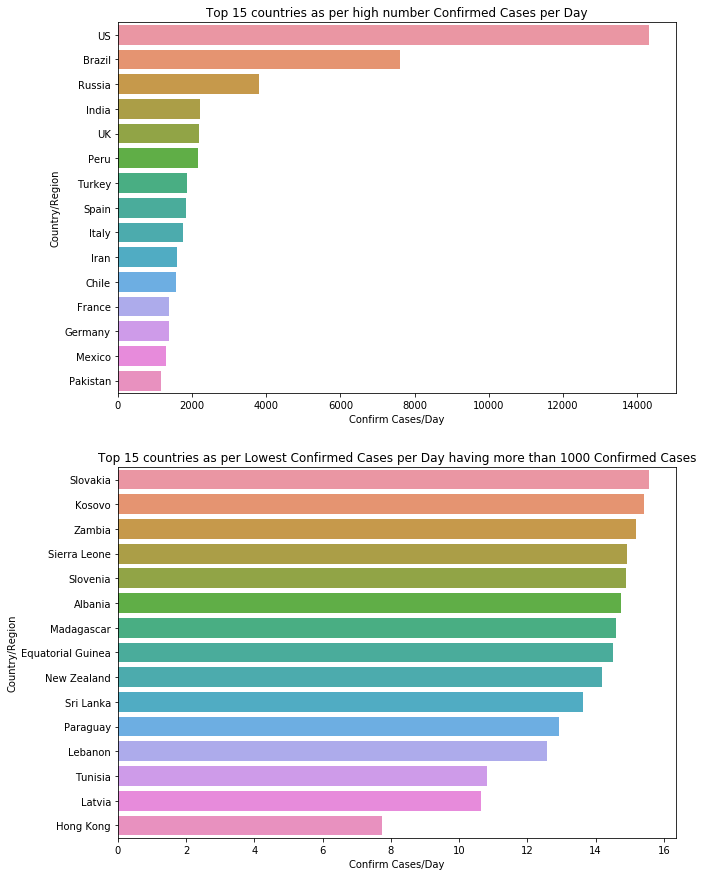

In [28]:
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(10,15))
top_15_ccpd=countrywise.sort_values(["Confirm Cases/Day"],ascending=False).head(15)
sns.barplot(y=top_15_ccpd.index,x=top_15_ccpd["Confirm Cases/Day"],ax=ax1)
ax1.set_title("Top 15 countries as per high number Confirmed Cases per Day")
bottom_15_ccpd=countrywise[countrywise["Confirmed"]>1000].sort_values(["Confirm Cases/Day"],ascending=False).tail(15)
sns.barplot(y=bottom_15_ccpd.index,x=bottom_15_ccpd["Confirm Cases/Day"],ax=ax2)
ax2.set_title("Top 15 countries as per Lowest Confirmed Cases per Day having more than 1000 Confirmed Cases")

Mainland China has recorded highest number of Closed cases as thier Recovery Rate is staggering recording 85%+

Confirmed Cases/Day is clear indication of why US has highest number of Active Cases currently. The rate is 11000+ cases per day. Showing increase in that value every day.

When we are in the middle of the exponential growth it's almost impossible to tell where are we heading.
Here, I am trying to show how we can interpret the exponential growth which is the common trend among all the countries

In [29]:
grouped_country=covid.groupby(["Country/Region","ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})

In [30]:
grouped_country["Active Cases"]=grouped_country["Confirmed"]-grouped_country["Recovered"]-grouped_country["Deaths"]
grouped_country["log_confirmed"]=np.log(grouped_country["Confirmed"])
grouped_country["log_active"]=np.log(grouped_country["Active Cases"])


Text(0.5, 1.0, 'COVID-19 Journey of Top 10 countries having Highest number of Confirmed Cases')

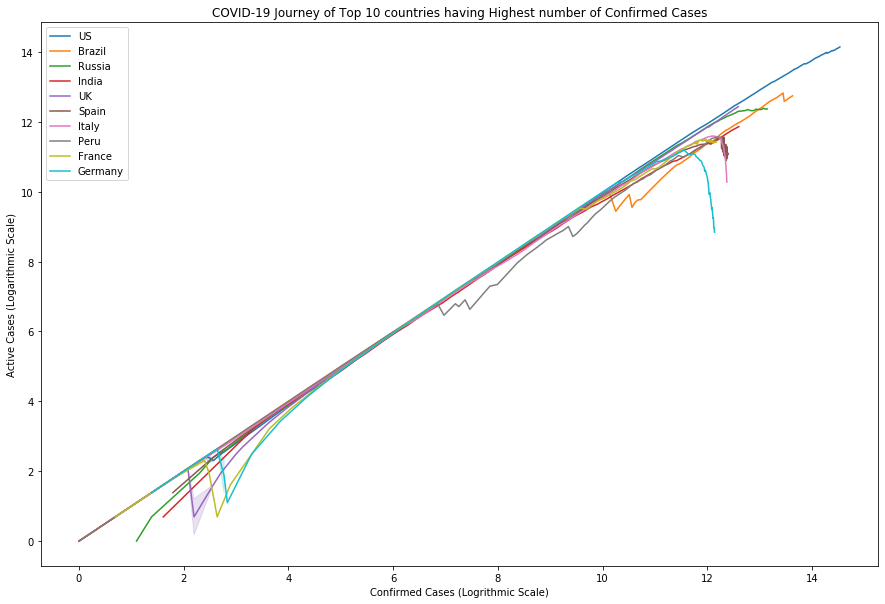

In [31]:
plt.figure(figsize=(15,10))
for country in countrywise.head(10).index:
    sns.lineplot(x=grouped_country.ix[country]["log_confirmed"],y=grouped_country.ix[country]["log_active"],label=country)
plt.xlabel("Confirmed Cases (Logrithmic Scale)")
plt.ylabel("Active Cases (Logarithmic Scale)")
plt.title("COVID-19 Journey of Top 10 countries having Highest number of Confirmed Cases")


It's pretty evident that the disease is spreading in same manner everywhere, but if particular country is following pandemic controlling practices rigrously the results are evident in the graph.

Most of the countries will follow the same trajectory as that USA, which is "Uncontrolled Exponential Growth"


Classic example is China where the graph shows the sharp dip, which is an evidence that they are able to get control over the COVID-19

Germany and Iran are seems to be heading towards that dip, showing the pandemic control practices are woking in favour.

<h2>Clustering of Countries</h2>

In [32]:
countrywise[["Confirmed","Deaths"]].head()

,Confirmed,Deaths
Country/Region,,
US,2048986.0,114669.0
Brazil,828810.0,41828.0
Russia,510761.0,6705.0
India,297535.0,8498.0
UK,294402.0,41566.0


In [33]:
#import spark
#spark_df = spark.createDataFrame(countrywise[["Confirmed","Deaths"]])


In [34]:
#countrywise[["Confirmed","Deaths"]].write.mode("overwrite").saveAsTable("db.table_name")

In [35]:
X=countrywise[["Confirmed","Deaths"]]
X=std.fit_transform(X)

In [36]:
wcss=[]
sil=[]
for i in range(2,11):
    clf=KMeans(n_clusters=i,init='k-means++',random_state=42)
    clf.fit(X)
    labels=clf.labels_
    centroids=clf.cluster_centers_
    sil.append(silhouette_score(X, labels, metric='euclidean'))
    wcss.append(clf.inertia_)

Text(0.5, 1.0, 'Silhouette Score Method')

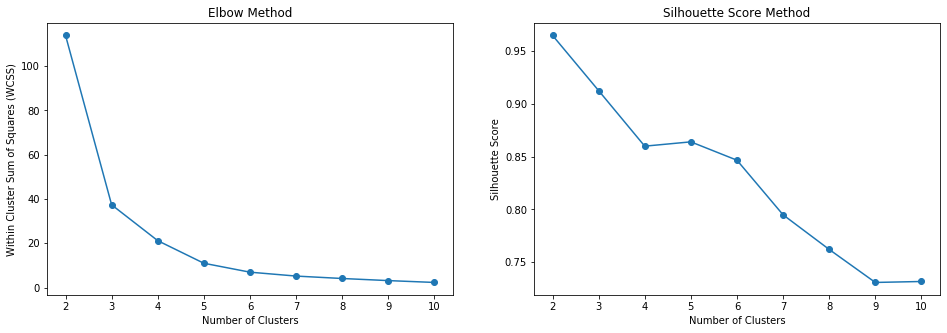

In [37]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,5))
x=np.arange(2,11)
ax1.plot(x,wcss,marker='o')
ax1.set_xlabel("Number of Clusters")
ax1.set_ylabel("Within Cluster Sum of Squares (WCSS)")
ax1.set_title("Elbow Method")
x=np.arange(2,11)
ax2.plot(x,sil,marker='o')
ax2.set_xlabel("Number of Clusters")
ax2.set_ylabel("Silhouette Score")
ax2.set_title("Silhouette Score Method")


<h2>Correct number of Clusters could be k=3</h2>

In [38]:
clf_final=KMeans(n_clusters=3,init='k-means++',random_state=42)
clf_final.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [39]:
countrywise["Clusters"]=clf_final.predict(X)
countrywise["Clusters"].head()

Country/Region
US        1
Brazil    2
Russia    2
India     0
UK        2
Name: Clusters, dtype: int32

<h3>Summary of Clusters</h3>

In [40]:
countrywise[countrywise["Clusters"]==3]

,Confirmed,Recovered,Deaths,Mortality,Recovery,Active Cases,Outcome Cases,Confirm Cases/Day,Clusters
Country/Region,,,,,,,,,


In [41]:
cluster_summary=pd.concat([countrywise[countrywise["Clusters"]==1],countrywise[countrywise["Clusters"]==2],countrywise[countrywise["Clusters"]==0].head(15)])
cluster_summary.style.background_gradient(cmap='Reds')

,Confirmed,Recovered,Deaths,Mortality,Recovery,Active Cases,Outcome Cases,Confirm Cases/Day,Clusters
Country/Region,,,,,,,,,
US,2.04899e+06,547386,114669,5.59638,26.715,1.38693e+06,662055,14328.6,1
Brazil,828810,445123,41828,5.04675,53.7063,341859,486951,7603.76,2
Russia,510761,268862,6705,1.31275,52.6395,235194,275567,3811.65,2
UK,294402,1282,41566,14.1188,0.435459,251554,42848,2197.03,2
Spain,243209,150376,27136,11.1575,61.8299,65697,177512,1828.64,2
Italy,236305,173085,34223,14.4826,73.2464,28997,207308,1763.47,2
France,193220,72695,29377,15.2039,37.6229,91148,102072,1370.35,2
India,297535,147195,8498,2.85613,49.4715,141842,155693,2203.96,0
Peru,214788,107133,6088,2.83442,49.8785,101567,113221,2169.58,0


Cluster 0 is a set of countries which are moderately or very less affected, few of these countries might have very high number of Confirmed Cases but comparitively very low Death number. e.g. Russia, Germany, Turkey.

Cluster 1 is set of countries which are severly affected, having really high number of Confirmed and Death Cases. e.g. United States

Cluster 2 belongs to countries which are worst affected moderately high number of Confirmed and Death cases, but lower than countries belonging to Cluster 1

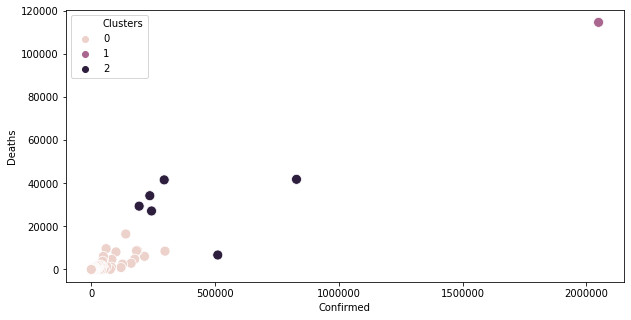

In [42]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=countrywise["Confirmed"],y=countrywise["Deaths"],hue=countrywise["Clusters"],s=100)

<h1>Data Analysis for India</h2>

In [43]:
india_data=covid[covid["Country/Region"]=="India"]
datewise_india=india_data.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
print(datewise_india.iloc[-1])
print("Total Active Cases: ",datewise_india["Confirmed"].iloc[-1]-datewise_india["Recovered"].iloc[-1]-datewise_india["Deaths"].iloc[-1])
print("Total Closed Cases: ",datewise_india["Recovered"].iloc[-1]+datewise_india["Deaths"].iloc[-1])

Confirmed    297535.0
Recovered    147195.0
Deaths         8498.0
Name: 2020-06-12 00:00:00, dtype: float64
Total Active Cases:  141842.0
Total Closed Cases:  155693.0


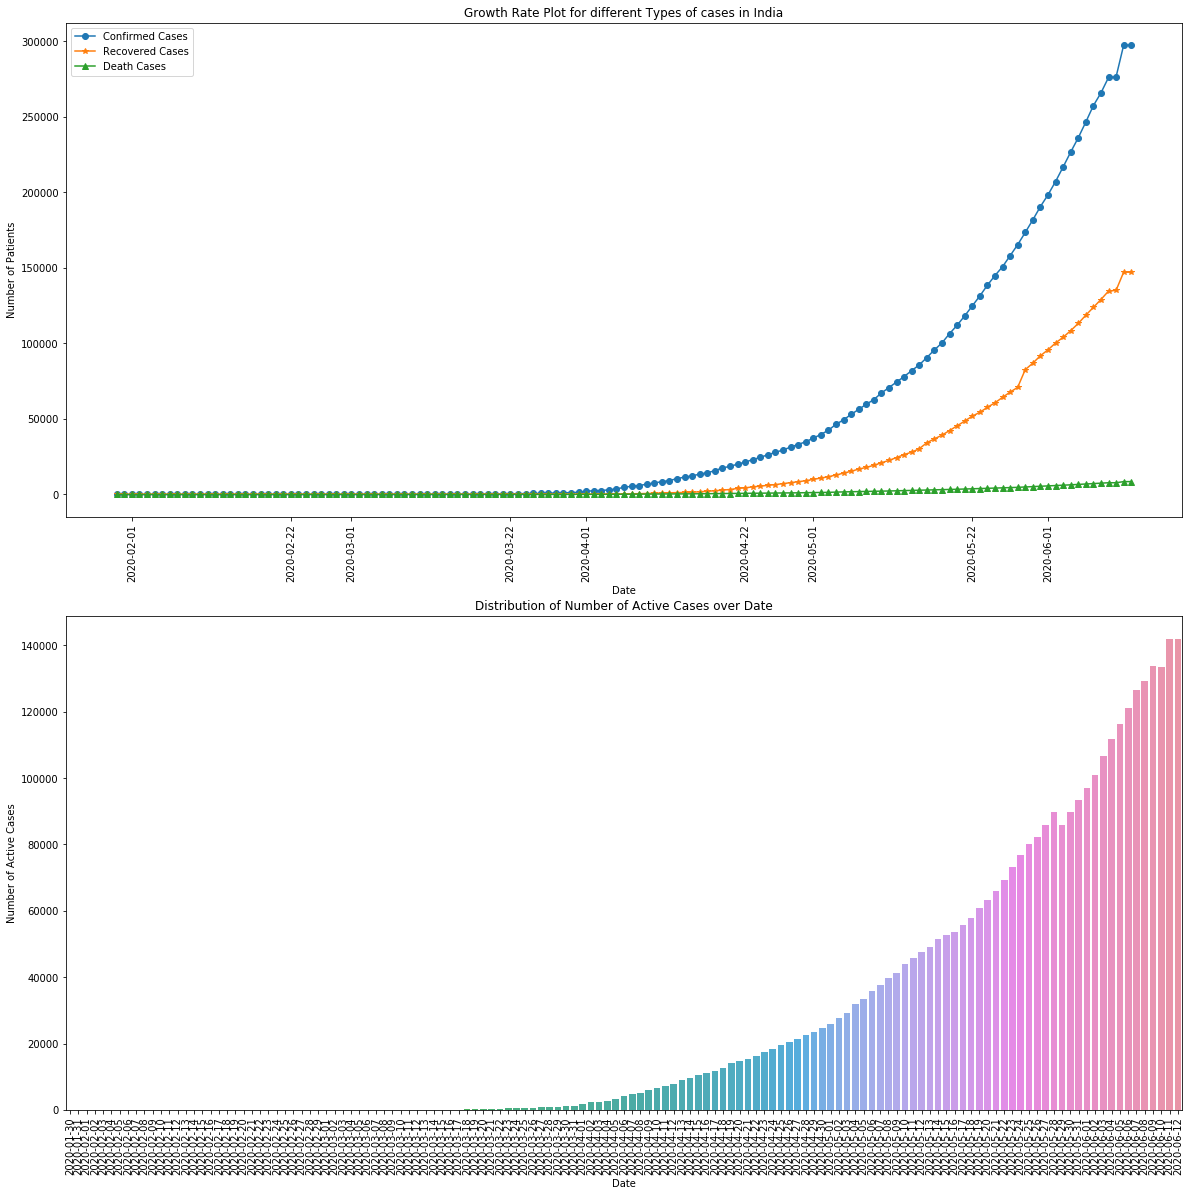

In [44]:
fig, (ax1,ax2) = plt.subplots(2, 1,figsize=(20,20))
ax1.plot(datewise_india["Confirmed"],marker='o',label="Confirmed Cases")
ax1.plot(datewise_india["Recovered"],marker='*',label="Recovered Cases")
ax1.plot(datewise_india["Deaths"],marker='^',label="Death Cases")
ax1.set_ylabel("Number of Patients")
ax1.set_xlabel("Date")
ax1.legend()
ax1.set_title("Growth Rate Plot for different Types of cases in India")
for tick in ax1.get_xticklabels():
    tick.set_rotation(90)
sns.barplot(datewise_india.index.date,datewise_india["Confirmed"]-datewise_india["Recovered"]-datewise_india["Deaths"],ax=ax2)
ax2.set_xlabel("Date")
ax2.set_ylabel("Number of Active Cases")
ax2.set_title("Distribution of Number of Active Cases over Date")
for tick in ax2.get_xticklabels():
    tick.set_rotation(90)

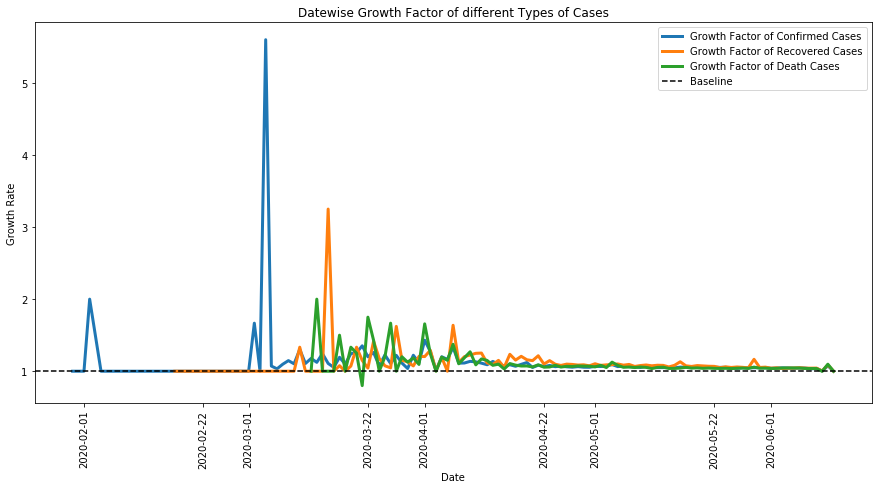

In [45]:
india_increase_confirm=[]
india_increase_recover=[]
india_increase_deaths=[]
for i in range(datewise_india.shape[0]-1):
    india_increase_confirm.append(((datewise_india["Confirmed"].iloc[i+1])/datewise_india["Confirmed"].iloc[i]))
    india_increase_recover.append(((datewise_india["Recovered"].iloc[i+1])/datewise_india["Recovered"].iloc[i]))
    india_increase_deaths.append(((datewise_india["Deaths"].iloc[i+1])/datewise_india["Deaths"].iloc[i]))
india_increase_confirm.insert(0,1)
india_increase_recover.insert(0,1)
india_increase_deaths.insert(0,1)

plt.figure(figsize=(15,7))
plt.plot(datewise_india.index,india_increase_confirm,label="Growth Factor of Confirmed Cases",linewidth=3)
plt.plot(datewise_india.index,india_increase_recover,label="Growth Factor of Recovered Cases",linewidth=3)
plt.plot(datewise_india.index,india_increase_deaths,label="Growth Factor of Death Cases",linewidth=3)
plt.axhline(1,linestyle='--',color="black",label="Baseline")
plt.xticks(rotation=90)
plt.title("Datewise Growth Factor of different Types of Cases")
plt.ylabel("Growth Rate")
plt.xlabel("Date")
plt.legend()

(array([737456., 737477., 737485., 737506., 737516., 737537., 737546.,
        737567., 737577.]), <a list of 9 Text xticklabel objects>)

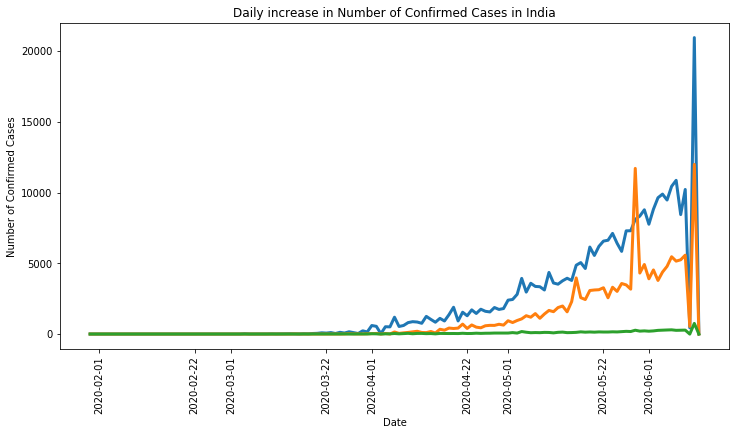

In [46]:
plt.figure(figsize=(12,6))
plt.plot(datewise_india["Confirmed"].diff().fillna(0),linewidth=3)
plt.plot(datewise_india["Recovered"].diff().fillna(0),linewidth=3)
plt.plot(datewise_india["Deaths"].diff().fillna(0),linewidth=3)
plt.ylabel("Number of Confirmed Cases")
plt.xlabel("Date")
plt.title("Daily increase in Number of Confirmed Cases in India")
plt.xticks(rotation=90)

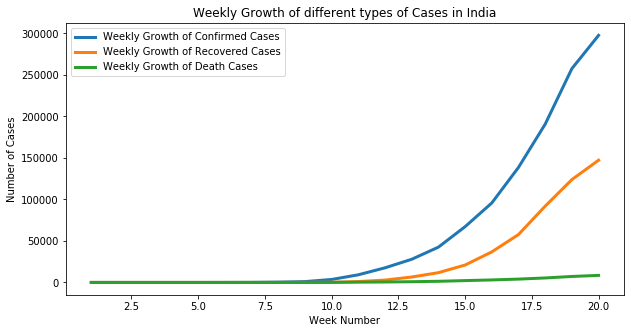

In [47]:
datewise_india["WeekOfYear"]=datewise_india.index.weekofyear

week_num_india=[]
india_weekwise_confirmed=[]
india_weekwise_recovered=[]
india_weekwise_deaths=[]
w=1
for i in list(datewise_india["WeekOfYear"].unique()):
    india_weekwise_confirmed.append(datewise_india[datewise_india["WeekOfYear"]==i]["Confirmed"].iloc[-1])
    india_weekwise_recovered.append(datewise_india[datewise_india["WeekOfYear"]==i]["Recovered"].iloc[-1])
    india_weekwise_deaths.append(datewise_india[datewise_india["WeekOfYear"]==i]["Deaths"].iloc[-1])
    week_num_india.append(w)
    w=w+1
    
plt.figure(figsize=(10,5))
plt.plot(week_num_india,india_weekwise_confirmed,linewidth=3,label="Weekly Growth of Confirmed Cases")
plt.plot(week_num_india,india_weekwise_recovered,linewidth=3,label="Weekly Growth of Recovered Cases")
plt.plot(week_num_india,india_weekwise_deaths,linewidth=3,label="Weekly Growth of Death Cases")
plt.xlabel('Week Number')
plt.ylabel("Number of Cases")
plt.title("Weekly Growth of different types of Cases in India")
plt.legend()

Text(0.5, 1.0, "India's Weekwise increase in Number of Death Cases")

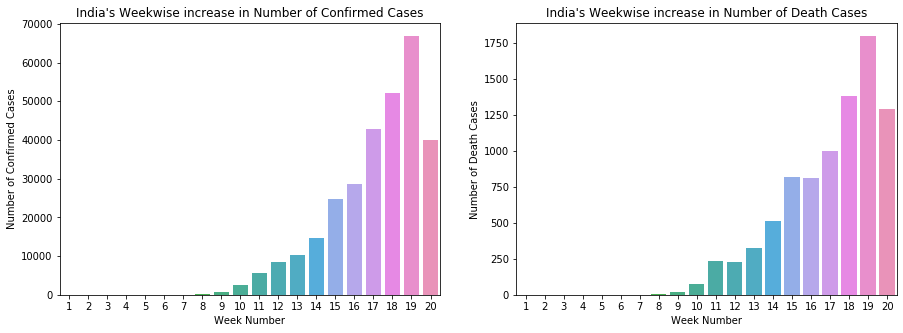

In [48]:
fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(15,5))
sns.barplot(x=week_num_india,y=pd.Series(india_weekwise_confirmed).diff().fillna(0),ax=ax1)
sns.barplot(x=week_num_india,y=pd.Series(india_weekwise_deaths).diff().fillna(0),ax=ax2)
ax1.set_xlabel("Week Number")
ax2.set_xlabel("Week Number")
ax1.set_ylabel("Number of Confirmed Cases")
ax2.set_ylabel("Number of Death Cases")
ax1.set_title("India's Weekwise increase in Number of Confirmed Cases")
ax2.set_title("India's Weekwise increase in Number of Death Cases")

In [49]:
china_data=covid[covid["Country/Region"]=="Mainland China"]
Italy_data=covid[covid["Country/Region"]=="Italy"]
US_data=covid[covid["Country/Region"]=="US"]
spain_data=covid[covid["Country/Region"]=="Spain"]
rest_of_world=covid[(covid["Country/Region"]!="Mainland China")&(covid["Country/Region"]!="Italy")&(covid["Country/Region"]!="US")&(covid["Country/Region"]!="Spain")]

datewise_china=china_data.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
datewise_Italy=Italy_data.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
datewise_US=US_data.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
datewise_Spain=spain_data.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
datewise_restofworld=rest_of_world.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})

It took 134 days in Italy to reach number of Confirmed Cases equivalent to India
It took 73 days in USA to reach number of Confirmed Cases equivalent to India
It took 133 days in Spain to reach number of Confirmed Cases equivalent to India
It took 135 days in India to reach 297535.0 Confirmed Cases


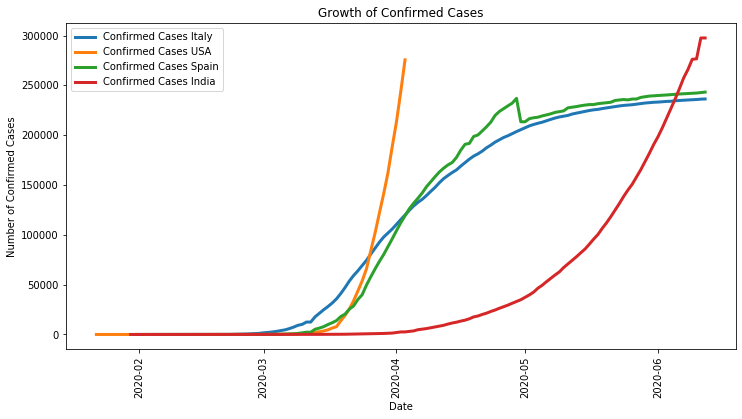

In [50]:
max_ind=datewise_india["Confirmed"].max()
plt.figure(figsize=(12,6))
plt.plot(datewise_Italy[(datewise_Italy["Confirmed"]>0)&(datewise_Italy["Confirmed"]<=max_ind)]["Confirmed"],label="Confirmed Cases Italy",linewidth=3)
plt.plot(datewise_US[(datewise_US["Confirmed"]>0)&(datewise_US["Confirmed"]<=max_ind)]["Confirmed"],label="Confirmed Cases USA",linewidth=3)
plt.plot(datewise_Spain[(datewise_Spain["Confirmed"]>0)&(datewise_Spain["Confirmed"]<=max_ind)]["Confirmed"],label="Confirmed Cases Spain",linewidth=3)
plt.plot(datewise_india[datewise_india["Confirmed"]>0]["Confirmed"],label="Confirmed Cases India",linewidth=3)
plt.xlabel("Date")
plt.ylabel("Number of Confirmed Cases")
plt.title("Growth of Confirmed Cases")
plt.legend()
plt.xticks(rotation=90)

print("It took",datewise_Italy[(datewise_Italy["Confirmed"]>0)&(datewise_Italy["Confirmed"]<=max_ind)].shape[0],"days in Italy to reach number of Confirmed Cases equivalent to India")
print("It took",datewise_US[(datewise_US["Confirmed"]>0)&(datewise_US["Confirmed"]<=max_ind)].shape[0],"days in USA to reach number of Confirmed Cases equivalent to India")
print("It took",datewise_Spain[(datewise_Spain["Confirmed"]>0)&(datewise_Spain["Confirmed"]<=max_ind)].shape[0],"days in Spain to reach number of Confirmed Cases equivalent to India")
print("It took",datewise_india[datewise_india["Confirmed"]>0].shape[0],"days in India to reach",max_ind,"Confirmed Cases")

Comparison of Daily Increase in Number of Cases of Italy, Spain, USA and India, where maximum number of Confirmed Cases are equivalent to maximum number of Confirmed Cases in India

(array([737456., 737485., 737516., 737546., 737577.]),
 <a list of 5 Text xticklabel objects>)

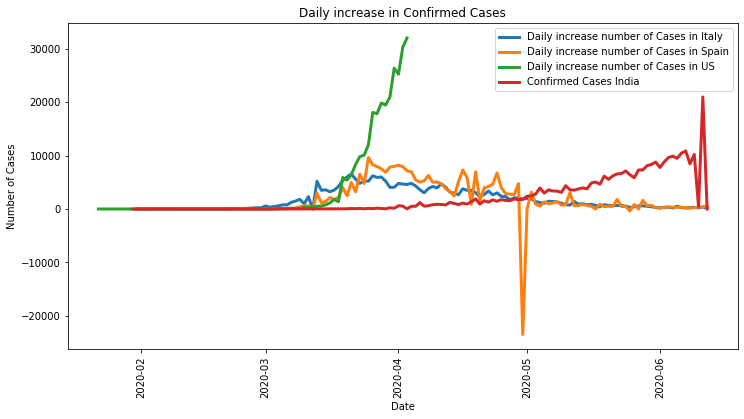

In [51]:
plt.figure(figsize=(12,6))
plt.plot(datewise_Italy[(datewise_Italy["Confirmed"]>0)&(datewise_Italy["Confirmed"]<=max_ind)]["Confirmed"].diff().fillna(0),label="Daily increase number of Cases in Italy",linewidth=3)
plt.plot(datewise_Spain[(datewise_Spain["Confirmed"]>0)&(datewise_Spain["Confirmed"]<=max_ind)]["Confirmed"].diff().fillna(0),label="Daily increase number of Cases in Spain",linewidth=3)
plt.plot(datewise_US[(datewise_US["Confirmed"]>0)&(datewise_US["Confirmed"]<=max_ind)]["Confirmed"].diff().fillna(0),label="Daily increase number of Cases in US",linewidth=3)
plt.plot(datewise_india[datewise_india["Confirmed"]>0]["Confirmed"].diff().fillna(0),label="Confirmed Cases India",linewidth=3)
plt.ylabel("Number of Cases")
plt.xlabel("Date")
plt.title("Daily increase in Confirmed Cases")
plt.legend()
plt.xticks(rotation=90)

<h1>Prediction using Machine Learning Models</h1>

In [44]:
datewise["Days Since"]=datewise.index-datewise.index[0]
datewise["Days Since"]

ObservationDate
2020-01-22     0 days
2020-01-23     1 days
2020-01-24     2 days
2020-01-25     3 days
2020-01-26     4 days
2020-01-27     5 days
2020-01-28     6 days
2020-01-29     7 days
2020-01-30     8 days
2020-01-31     9 days
2020-02-01    10 days
2020-02-02    11 days
2020-02-03    12 days
2020-02-04    13 days
2020-02-05    14 days
2020-02-06    15 days
2020-02-07    16 days
2020-02-08    17 days
2020-02-09    18 days
2020-02-10    19 days
2020-02-11    20 days
2020-02-12    21 days
2020-02-13    22 days
2020-02-14    23 days
2020-02-15    24 days
2020-02-16    25 days
2020-02-17    26 days
2020-02-18    27 days
2020-02-19    28 days
2020-02-20    29 days
               ...   
2020-04-06    75 days
2020-04-07    76 days
2020-04-08    77 days
2020-04-09    78 days
2020-04-10    79 days
2020-04-11    80 days
2020-04-12    81 days
2020-04-13    82 days
2020-04-14    83 days
2020-04-15    84 days
2020-04-16    85 days
2020-04-17    86 days
2020-04-18    87 days
2020-04-19    88

In [45]:
datewise["Days Since"]=datewise["Days Since"].dt.days
datewise["Days Since"].head()

ObservationDate
2020-01-22    0
2020-01-23    1
2020-01-24    2
2020-01-25    3
2020-01-26    4
Freq: D, Name: Days Since, dtype: int64

In [46]:
train_ml=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid_ml=datewise.iloc[int(datewise.shape[0]*0.95):]
model_scores=[]

<h1>LinearRegression</h1>

In [47]:
lin_reg=LinearRegression(normalize=True)

In [48]:
lin_reg.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Confirmed"]).reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [49]:
prediction_valid_linreg=lin_reg.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))
model_scores.append(np.sqrt(mean_squared_error(valid_ml["Confirmed"],prediction_valid_linreg)))
print("Root Mean Square Error for Linear Regression: ",np.sqrt(mean_squared_error(valid_ml["Confirmed"],prediction_valid_linreg)))

Root Mean Square Error for Linear Regression:  1237577.9745851525


In [50]:
from statsmodels.tsa.stattools import acf

def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
                        # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 
            'corr':corr, 'minmax':minmax})





In [51]:
a=np.array(valid_ml["Confirmed"]).reshape(6,1)
a.shape

(6, 1)

In [52]:
forecast_accuracy(prediction_valid_linreg,a)

{'mape': 0.35595307582777874,
 'me': -1234394.4217893213,
 'mae': 1234394.4217893213,
 'mpe': -0.35595307582777874,
 'rmse': 1237577.9745851525,
 'corr': nan,
 'minmax': 0.3559530758277788}

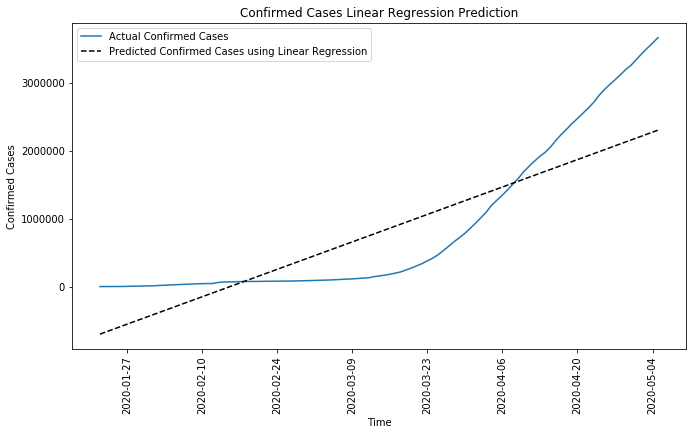

In [53]:
plt.figure(figsize=(11,6))
prediction_linreg=lin_reg.predict(np.array(datewise["Days Since"]).reshape(-1,1))
plt.plot(datewise["Confirmed"],label="Actual Confirmed Cases")
plt.plot(datewise.index,prediction_linreg, linestyle='--',label="Predicted Confirmed Cases using Linear Regression",color='black')
plt.xlabel('Time')
plt.ylabel('Confirmed Cases')
plt.title("Confirmed Cases Linear Regression Prediction")
plt.xticks(rotation=90)
plt.legend()

The Linear Regression Model is absolutely falling aprat. As it is clearly visible that the trend of Confirmed Cases in absolutely not Linear

<h2>Polynomial Regression for Prediction of Confirmed Cases</h2>

In [54]:
poly = PolynomialFeatures(degree = 2) 

In [55]:
train_poly=poly.fit_transform(np.array(train_ml["Days Since"]).reshape(-1,1))
valid_poly=poly.fit_transform(np.array(valid_ml["Days Since"]).reshape(-1,1))
y=train_ml["Confirmed"]

In [56]:
linreg=LinearRegression(normalize=True)
linreg.fit(train_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [57]:
prediction_poly=linreg.predict(valid_poly)
rmse_poly=np.sqrt(mean_squared_error(valid_ml["Confirmed"],prediction_poly))
model_scores.append(rmse_poly)
print("Root Mean Squared Error for Polynomial Regression: ",rmse_poly)

Root Mean Squared Error for Polynomial Regression:  37090.54643276352


In [58]:
a=np.array(valid_ml["Confirmed"]).reshape(6,1)
a.shape

(6, 1)

In [60]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
                 # minmax
                        # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 
            })


In [61]:
forecast_accuracy(prediction_poly,a) 

{'mape': 0.05144319034586384,
 'me': 24384.978380222805,
 'mae': 177375.5440870292,
 'mpe': 0.0086464442860623,
 'rmse': 216811.57770811522}

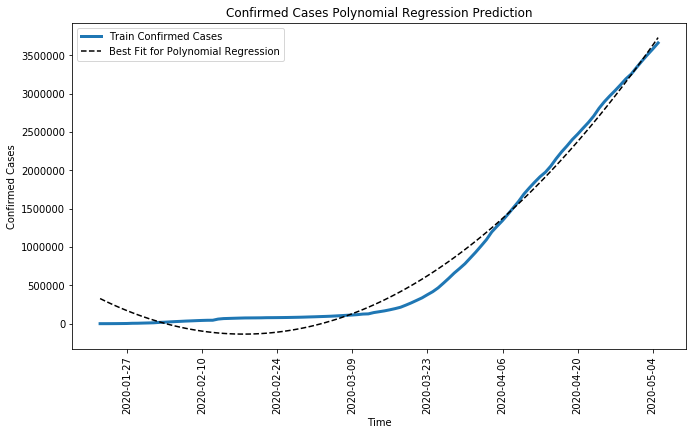

In [62]:
comp_data=poly.fit_transform(np.array(datewise["Days Since"]).reshape(-1,1))
plt.figure(figsize=(11,6))
predictions_poly=linreg.predict(comp_data)
plt.plot(datewise["Confirmed"],label="Train Confirmed Cases",linewidth=3)
plt.plot(datewise.index,predictions_poly, linestyle='--',label="Best Fit for Polynomial Regression",color='black')
plt.xlabel('Time')
plt.ylabel('Confirmed Cases')
plt.title("Confirmed Cases Polynomial Regression Prediction")
plt.xticks(rotation=90)
plt.legend()

In [63]:
new_prediction_poly=[]
for i in range(1,18):
    new_date_poly=poly.fit_transform(np.array(datewise["Days Since"].max()+i).reshape(-1,1))
    #print(new_date_poly)
    new_prediction_poly.append(linreg.predict(new_date_poly)[0])

In [64]:
new_prediction_poly[:10]

[3832944.588269984,
 3935015.77546332,
 4038383.0032231105,
 4143046.271549356,
 4249005.580442058,
 4356260.929901214,
 4464812.319926825,
 4574659.750518892,
 4685803.221677414,
 4798242.733402391]

In [65]:
new_date=[]
new_prediction_lr=[]
new_prediction_svm=[]
for i in range(1,18):
    new_date.append(datewise.index[-1]+timedelta(days=i))
    new_prediction_lr.append(lin_reg.predict(np.array(datewise["Days Since"].max()+i).reshape(-1,1))[0][0])
    #new_prediction_svm.append(svm.predict(np.array(datewise["Days Since"].max()+i).reshape(-1,1))[0])

In [66]:
pd.set_option('display.float_format', lambda x: '%.6f' % x)
model_predictions=pd.DataFrame(list(zip(new_date,new_prediction_lr,new_prediction_poly)),columns=["Dates","Linear Regression Prediction","Polynonmial Regression Prediction"])
model_predictions.head()

,Dates,Linear Regression Prediction,Polynonmial Regression Prediction
0,2020-05-06,2329969.544704,3832944.588270
1,2020-05-07,2358814.439893,3935015.775463
2,2020-05-08,2387659.335081,4038383.003223
3,2020-05-09,2416504.230270,4143046.271549
4,2020-05-10,2445349.125459,4249005.580442


<h2>Support Vector Machine ModelRegressor for Prediction of Confirmed Cases</h2>

In [ ]:
#svm=SVR(C=1,degree=5,kernel='poly',epsilon=0.01)


In [ ]:
#svm.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Confirmed"]).reshape(-1,1))



In [ ]:
#prediction_valid_svm=svm.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))

In [ ]:
#model_scores.append(np.sqrt(mean_squared_error(valid_ml["Confirmed"],prediction_valid_svm)))
#print("Root Mean Square Error for Support Vectore Machine: ",np.sqrt(mean_squared_error(valid_ml["Confirmed"],prediction_valid_svm)))

In [ ]:
'''plt.figure(figsize=(11,6))
prediction_svm=svm.predict(np.array(datewise["Days Since"]).reshape(-1,1))
plt.plot(datewise["Confirmed"],label="Train Confirmed Cases",linewidth=3)
plt.plot(datewise.index,prediction_svm, linestyle='--',label="Best Fit for SVR",color='black')
plt.xlabel('Time')
plt.ylabel('Confirmed Cases')
plt.title("Confirmed Cases Support Vector Machine Regressor Prediction")
plt.xticks(rotation=90)
plt.legend()'''

`<h2>Time Series Forecasting</h2>

<h4>Holt's Linear Model</h4>

In [67]:
model_train=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid=datewise.iloc[int(datewise.shape[0]*0.95):]

holt=Holt(np.asarray(model_train["Confirmed"])).fit(smoothing_level=0.3, smoothing_slope=0.1,optimized=False)
y_pred=valid.copy()

Root Mean Square Error Holt's Linear Model:  17209.453044119906


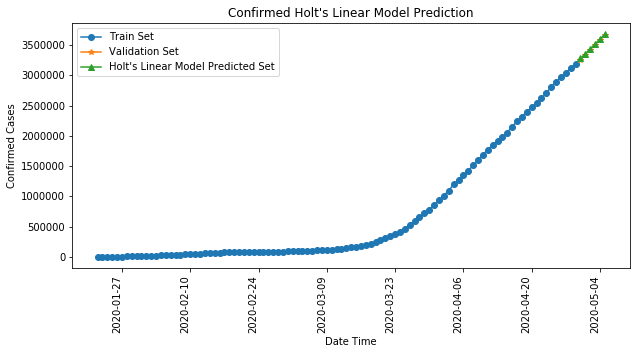

In [68]:
y_pred["Holt"]=holt.forecast(len(valid))
model_scores.append(np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["Holt"])))
print("Root Mean Square Error Holt's Linear Model: ",np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["Holt"])))

plt.figure(figsize=(10,5))
plt.plot(model_train.Confirmed,label="Train Set",marker='o')
valid.Confirmed.plot(label="Validation Set",marker='*')
y_pred.Holt.plot(label="Holt's Linear Model Predicted Set",marker='^')
plt.ylabel("Confirmed Cases")
plt.xlabel("Date Time")
plt.title("Confirmed Holt's Linear Model Prediction")
plt.xticks(rotation=90)
plt.legend()


In [69]:
holt_new_date=[]
holt_new_prediction=[]
for i in range(1,18):
    holt_new_date.append(datewise.index[-1]+timedelta(days=i))
    holt_new_prediction.append(holt.forecast((len(valid)+i))[-1])

model_predictions["Holt's Linear Model Prediction"]=holt_new_prediction
model_predictions.head()

,Dates,Linear Regression Prediction,Polynonmial Regression Prediction,Holt's Linear Model Prediction
0,2020-05-06,2329969.544704,3832944.588270,3760963.326319
1,2020-05-07,2358814.439893,3935015.775463,3841154.558930
2,2020-05-08,2387659.335081,4038383.003223,3921345.791541
3,2020-05-09,2416504.230270,4143046.271549,4001537.024152
4,2020-05-10,2445349.125459,4249005.580442,4081728.256763


In [70]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
                        # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 
            'corr':corr, 'minmax':minmax})




In [71]:
forecast_accuracy(y_pred["Holt"],y_pred["Confirmed"])  

{'mape': 0.004896819226473402,
 'me': 16887.178847564617,
 'mae': 16887.178847564617,
 'mpe': 0.004896819226473402,
 'rmse': 17209.453044119906,
 'corr': 0.9997356706456876,
 'minmax': 0.004871814087051729}

<h3>Holt's Winter Model for Daily Time Series</h3>

Root Mean Square Error for Holt's Winter Model:  17367.85132851245


C:\Users\HP\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


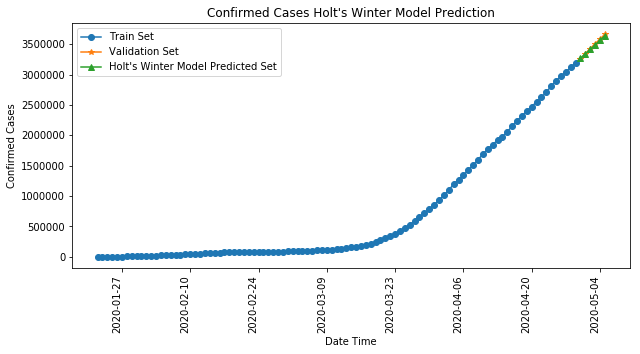

In [72]:
es=ExponentialSmoothing(np.asarray(model_train['Confirmed']),seasonal_periods=10,trend='add', seasonal='add').fit()
y_pred["Holt's Winter Model"]=es.forecast(len(valid))

model_scores.append(np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["Holt's Winter Model"])))
print("Root Mean Square Error for Holt's Winter Model: ",np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["Holt's Winter Model"])))



plt.figure(figsize=(10,5))
plt.plot(model_train.Confirmed,label="Train Set",marker='o')
valid.Confirmed.plot(label="Validation Set",marker='*')
y_pred["Holt\'s Winter Model"].plot(label="Holt's Winter Model Predicted Set",marker='^')
plt.ylabel("Confirmed Cases")
plt.xlabel("Date Time")
plt.title("Confirmed Cases Holt's Winter Model Prediction")
plt.xticks(rotation=90)
plt.legend()

In [73]:
forecast_accuracy(y_pred["Holt's Winter Model"],y_pred["Confirmed"])  

{'mape': 0.004562846571878893,
 'me': -11830.672709248882,
 'mae': 15997.803755755614,
 'mpe': -0.0032833476190555996,
 'rmse': 17367.85132851245,
 'corr': 0.9992833552220859,
 'minmax': 0.004560400285585686}

In [74]:
holt_winter_new_prediction=[]
for i in range(1,18):
    holt_winter_new_prediction.append(es.forecast((len(valid)+i))[-1])
model_predictions["Holt's Winter Model Prediction"]=holt_winter_new_prediction
model_predictions.head()

,Dates,Linear Regression Prediction,Polynonmial Regression Prediction,Holt's Linear Model Prediction,Holt's Winter Model Prediction
0,2020-05-06,2329969.544704,3832944.588270,3760963.326319,3715049.458883
1,2020-05-07,2358814.439893,3935015.775463,3841154.558930,3791827.906411
2,2020-05-08,2387659.335081,4038383.003223,3921345.791541,3868609.323834
3,2020-05-09,2416504.230270,4143046.271549,4001537.024152,3945362.118336
4,2020-05-10,2445349.125459,4249005.580442,4081728.256763,4021003.555966


In [75]:
model_predictions.head(20)

,Dates,Linear Regression Prediction,Polynonmial Regression Prediction,Holt's Linear Model Prediction,Holt's Winter Model Prediction
0,2020-05-06,2329969.544704,3832944.588270,3760963.326319,3715049.458883
1,2020-05-07,2358814.439893,3935015.775463,3841154.558930,3791827.906411
2,2020-05-08,2387659.335081,4038383.003223,3921345.791541,3868609.323834
3,2020-05-09,2416504.230270,4143046.271549,4001537.024152,3945362.118336
4,2020-05-10,2445349.125459,4249005.580442,4081728.256763,4021003.555966
5,2020-05-11,2474194.020647,4356260.929901,4161919.489374,4091835.278323
6,2020-05-12,2503038.915836,4464812.319927,4242110.721984,4164046.467120
7,2020-05-13,2531883.811025,4574659.750519,4322301.954595,4237794.519166
8,2020-05-14,2560728.706213,4685803.221677,4402493.187206,4314759.640872
9,2020-05-15,2589573.601402,4798242.733402,4482684.419817,4389954.479257


<h3>AR Model (using AUTO ARIMA)</h3>

In [76]:
model_train=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid=datewise.iloc[int(datewise.shape[0]*0.95):]
y_pred=valid.copy()

Fit ARIMA(0,2,0)x(0,0,0,0) [intercept=True]; AIC=2001.962, BIC=2007.111, Time=2.787 seconds
Fit ARIMA(1,2,0)x(0,0,0,0) [intercept=True]; AIC=2001.915, BIC=2009.639, Time=0.046 seconds
Fit ARIMA(2,2,0)x(0,0,0,0) [intercept=True]; AIC=2000.636, BIC=2010.935, Time=0.291 seconds
Fit ARIMA(3,2,0)x(0,0,0,0) [intercept=True]; AIC=2001.816, BIC=2014.689, Time=0.090 seconds
Fit ARIMA(4,2,0)x(0,0,0,0) [intercept=True]; AIC=2000.619, BIC=2016.067, Time=0.103 seconds
Fit ARIMA(5,2,0)x(0,0,0,0) [intercept=True]; AIC=1999.758, BIC=2017.781, Time=0.122 seconds
Total fit time: 3.455 seconds
Root Mean Square Error for MA Model:  26536.18782770886


(array([737451., 737465., 737479., 737493., 737507., 737521., 737535.,
        737549.]), <a list of 8 Text xticklabel objects>)

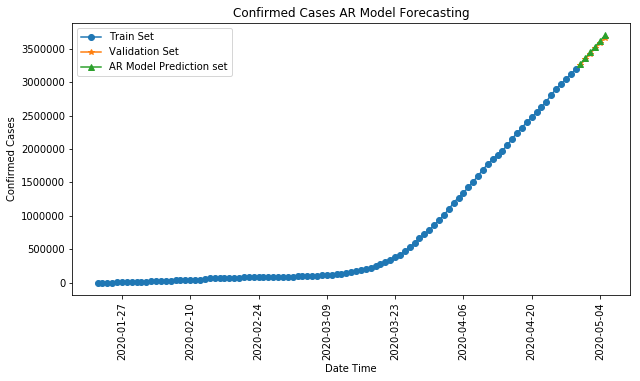

In [77]:
model_ar= auto_arima(model_train["Confirmed"],trace=True, error_action='ignore', start_p=0,start_q=0,max_p=5,max_q=0,
                   suppress_warnings=True,stepwise=False,seasonal=False)
model_ar.fit(model_train["Confirmed"])

prediction_ar=model_ar.predict(len(valid))
y_pred["AR Model Prediction"]=prediction_ar


model_scores.append(np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["AR Model Prediction"])))
print("Root Mean Square Error for MA Model: ",np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["AR Model Prediction"])))

plt.figure(figsize=(10,5))
plt.plot(model_train.index,model_train["Confirmed"],label="Train Set",marker='o')
plt.plot(valid.index,valid["Confirmed"],label="Validation Set",marker='*')
plt.plot(y_pred["AR Model Prediction"],label="AR Model Prediction set",marker="^")
plt.legend()
plt.xlabel("Date Time")
plt.ylabel('Confirmed Cases')
plt.title("Confirmed Cases AR Model Forecasting")
plt.xticks(rotation=90)

In [78]:
AR_model_new_prediction=[]
for i in range(1,18):
    AR_model_new_prediction.append(model_ar.predict(len(valid)+i)[-1])
model_predictions["AR Model Prediction"]=AR_model_new_prediction
model_predictions.head()

,Dates,Linear Regression Prediction,Polynonmial Regression Prediction,Holt's Linear Model Prediction,Holt's Winter Model Prediction,AR Model Prediction
0,2020-05-06,2329969.544704,3832944.588270,3760963.326319,3715049.458883,3785255.901300
1,2020-05-07,2358814.439893,3935015.775463,3841154.558930,3791827.906411,3872806.364446
2,2020-05-08,2387659.335081,4038383.003223,3921345.791541,3868609.323834,3961388.680490
3,2020-05-09,2416504.230270,4143046.271549,4001537.024152,3945362.118336,4050636.079962
4,2020-05-10,2445349.125459,4249005.580442,4081728.256763,4021003.555966,4140431.913120


In [79]:
forecast_accuracy(y_pred["AR Model Prediction"],y_pred["Confirmed"])  

{'mape': 0.0073776031823149955,
 'me': 25741.10710376462,
 'mae': 25741.10710376462,
 'mpe': 0.0073776031823149955,
 'rmse': 26536.18782770886,
 'corr': 0.999821732429961,
 'minmax': 0.007321179677509115}

<h3>MA Model (using AUTO ARIMA)</h3>

Fit ARIMA(0,2,0)x(0,0,0,0) [intercept=True]; AIC=2001.962, BIC=2007.111, Time=0.119 seconds
Fit ARIMA(0,2,1)x(0,0,0,0) [intercept=True]; AIC=2000.877, BIC=2008.601, Time=0.052 seconds
Fit ARIMA(0,2,2)x(0,0,0,0) [intercept=True]; AIC=2000.726, BIC=2011.025, Time=0.109 seconds
Fit ARIMA(0,2,3)x(0,0,0,0) [intercept=True]; AIC=2004.072, BIC=2016.946, Time=0.100 seconds
Total fit time: 0.380 seconds
Root Mean Square Error for MA Model:  17725.259671844826


(array([737451., 737465., 737479., 737493., 737507., 737521., 737535.,
        737549.]), <a list of 8 Text xticklabel objects>)

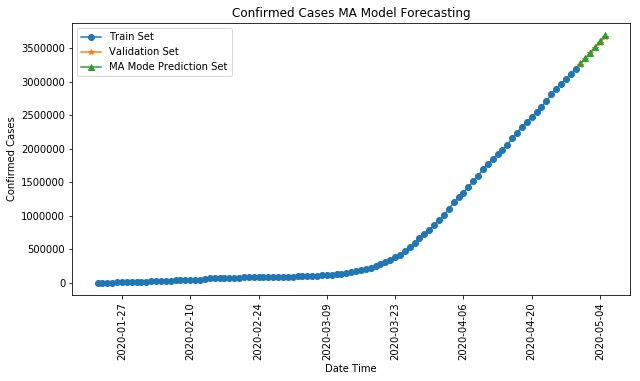

In [80]:
model_ma= auto_arima(model_train["Confirmed"],trace=True, error_action='ignore', start_p=0,start_q=0,max_p=0,max_q=3,
                   suppress_warnings=True,stepwise=False,seasonal=False)
model_ma.fit(model_train["Confirmed"])

prediction_ma=model_ma.predict(len(valid))
y_pred["MA Model Prediction"]=prediction_ma

model_scores.append(np.sqrt(mean_squared_error(valid["Confirmed"],prediction_ma)))
print("Root Mean Square Error for MA Model: ",np.sqrt(mean_squared_error(valid["Confirmed"],prediction_ma)))


plt.figure(figsize=(10,5))
plt.plot(model_train.index,model_train["Confirmed"],label="Train Set",marker='o')
plt.plot(valid.index,valid["Confirmed"],label="Validation Set",marker='*')
plt.plot(y_pred["MA Model Prediction"],label="MA Mode Prediction Set",marker='^')
plt.legend()
plt.xlabel("Date Time")
plt.ylabel('Confirmed Cases')
plt.title("Confirmed Cases MA Model Forecasting")
plt.xticks(rotation=90)

In [81]:
MA_model_new_prediction=[]
for i in range(1,18):
    MA_model_new_prediction.append(model_ma.predict(len(valid)+i)[-1])
model_predictions["MA Model Prediction"]=MA_model_new_prediction
model_predictions.head()

,Dates,Linear Regression Prediction,Polynonmial Regression Prediction,Holt's Linear Model Prediction,Holt's Winter Model Prediction,AR Model Prediction,MA Model Prediction
0,2020-05-06,2329969.544704,3832944.588270,3760963.326319,3715049.458883,3785255.901300,3778949.005619
1,2020-05-07,2358814.439893,3935015.775463,3841154.558930,3791827.906411,3872806.364446,3868210.484755
2,2020-05-08,2387659.335081,4038383.003223,3921345.791541,3868609.323834,3961388.680490,3958888.209037
3,2020-05-09,2416504.230270,4143046.271549,4001537.024152,3945362.118336,4050636.079962,4050982.178463
4,2020-05-10,2445349.125459,4249005.580442,4081728.256763,4021003.555966,4140431.913120,4144492.393035


In [82]:
forecast_accuracy(y_pred["MA Model Prediction"],y_pred["Confirmed"])  

{'mape': 0.004674093529342257,
 'me': 16345.283332294319,
 'mae': 16345.283332294319,
 'mpe': 0.004674093529342257,
 'rmse': 17725.259671844826,
 'corr': 0.9993977780468865,
 'minmax': 0.004649114436675039}

<h3>Arima model</h3>

Fit ARIMA(0,2,0)x(0,0,0,0) [intercept=True]; AIC=2001.962, BIC=2007.111, Time=0.011 seconds
Fit ARIMA(0,2,1)x(0,0,0,0) [intercept=True]; AIC=2000.877, BIC=2008.601, Time=0.025 seconds
Fit ARIMA(0,2,2)x(0,0,0,0) [intercept=True]; AIC=2000.726, BIC=2011.025, Time=0.059 seconds
Fit ARIMA(0,2,3)x(0,0,0,0) [intercept=True]; AIC=2004.072, BIC=2016.946, Time=0.111 seconds
Fit ARIMA(0,2,4)x(0,0,0,0) [intercept=True]; AIC=1999.220, BIC=2014.668, Time=0.177 seconds
Fit ARIMA(0,2,5)x(0,0,0,0) [intercept=True]; AIC=1995.054, BIC=2013.077, Time=0.261 seconds
Fit ARIMA(1,2,0)x(0,0,0,0) [intercept=True]; AIC=2001.915, BIC=2009.639, Time=0.025 seconds
Fit ARIMA(1,2,1)x(0,0,0,0) [intercept=True]; AIC=2002.604, BIC=2012.903, Time=0.087 seconds
Fit ARIMA(1,2,2)x(0,0,0,0) [intercept=True]; AIC=2002.572, BIC=2015.446, Time=0.159 seconds
Fit ARIMA(1,2,3)x(0,0,0,0) [intercept=True]; AIC=2002.844, BIC=2018.293, Time=0.287 seconds
Fit ARIMA(1,2,4)x(0,0,0,0) [intercept=True]; AIC=1995.174, BIC=2013.197, Time=0.

(array([737451., 737465., 737479., 737493., 737507., 737521., 737535.,
        737549.]), <a list of 8 Text xticklabel objects>)

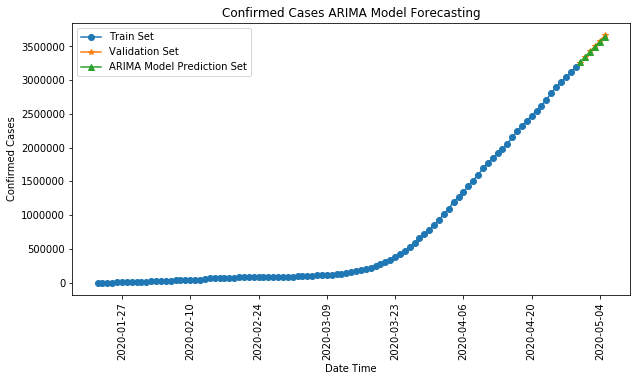

In [83]:
model_train=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid=datewise.iloc[int(datewise.shape[0]*0.95):]
y_pred=valid.copy()


model_arima= auto_arima(model_train["Confirmed"],trace=True, error_action='ignore', start_p=1,start_q=1,max_p=5,max_q=5,
                   suppress_warnings=True,stepwise=False,seasonal=False)
model_arima.fit(model_train["Confirmed"])

prediction_arima=model_arima.predict(len(valid))
y_pred["ARIMA Model Prediction"]=prediction_arima

model_scores.append(np.sqrt(mean_squared_error(valid["Confirmed"],prediction_arima)))
print("Root Mean Square Error for ARIMA Model: ",np.sqrt(mean_squared_error(valid["Confirmed"],prediction_arima)))

plt.figure(figsize=(10,5))
plt.plot(model_train.index,model_train["Confirmed"],label="Train Set",marker='o')
plt.plot(valid.index,valid["Confirmed"],label="Validation Set",marker='*')
plt.plot(y_pred["ARIMA Model Prediction"],label="ARIMA Model Prediction Set",marker='^')
plt.legend()
plt.xlabel("Date Time")
plt.ylabel('Confirmed Cases')
plt.title("Confirmed Cases ARIMA Model Forecasting")
plt.xticks(rotation=90)

In [84]:
ARIMA_model_new_prediction=[]
for i in range(1,18):
    ARIMA_model_new_prediction.append(model_arima.predict(len(valid)+i)[-1])
model_predictions["ARIMA Model Prediction"]=ARIMA_model_new_prediction
model_predictions.head()

,Dates,Linear Regression Prediction,Polynonmial Regression Prediction,Holt's Linear Model Prediction,Holt's Winter Model Prediction,AR Model Prediction,MA Model Prediction,ARIMA Model Prediction
0,2020-05-06,2329969.544704,3832944.588270,3760963.326319,3715049.458883,3785255.901300,3778949.005619,3720378.109266
1,2020-05-07,2358814.439893,3935015.775463,3841154.558930,3791827.906411,3872806.364446,3868210.484755,3795924.134023
2,2020-05-08,2387659.335081,4038383.003223,3921345.791541,3868609.323834,3961388.680490,3958888.209037,3872373.857752
3,2020-05-09,2416504.230270,4143046.271549,4001537.024152,3945362.118336,4050636.079962,4050982.178463,3949727.280451
4,2020-05-10,2445349.125459,4249005.580442,4081728.256763,4021003.555966,4140431.913120,4144492.393035,4027984.402121


In [85]:
forecast_accuracy(y_pred["ARIMA Model Prediction"],y_pred["Confirmed"])  

{'mape': 0.002898419134420774,
 'me': -2533.004649844564,
 'mae': 10056.317017753996,
 'mpe': -0.0006054273109110609,
 'rmse': 11360.64996091715,
 'corr': 0.9999097992749609,
 'minmax': 0.0028937190723298256}

<h2>SARIMA Model (using AUTO ARIMA)</h2>

In [86]:
model_sarima= auto_arima(model_train["Confirmed"],trace=True, error_action='ignore', 
                         start_p=0,start_q=0,max_p=5,max_q=5,m=12,
                   suppress_warnings=True,stepwise=True,seasonal=True)
model_sarima.fit(model_train["Confirmed"])

Performing stepwise search to minimize aic
Fit ARIMA(0,2,0)x(1,0,1,12) [intercept=True]; AIC=2003.877, BIC=2014.176, Time=1.181 seconds
Fit ARIMA(0,2,0)x(0,0,0,12) [intercept=True]; AIC=2001.962, BIC=2007.111, Time=0.014 seconds
Fit ARIMA(1,2,0)x(1,0,0,12) [intercept=True]; AIC=2002.071, BIC=2012.370, Time=0.242 seconds
Fit ARIMA(0,2,1)x(0,0,1,12) [intercept=True]; AIC=2001.375, BIC=2011.674, Time=0.118 seconds
Fit ARIMA(0,2,0)x(0,0,0,12) [intercept=False]; AIC=2001.171, BIC=2003.745, Time=0.010 seconds
Fit ARIMA(0,2,0)x(1,0,0,12) [intercept=True]; AIC=2001.878, BIC=2009.602, Time=0.106 seconds
Fit ARIMA(0,2,0)x(0,0,1,12) [intercept=True]; AIC=2001.979, BIC=2009.703, Time=0.106 seconds
Fit ARIMA(1,2,0)x(0,0,0,12) [intercept=True]; AIC=2001.915, BIC=2009.639, Time=0.012 seconds
Fit ARIMA(0,2,1)x(0,0,0,12) [intercept=True]; AIC=2000.877, BIC=2008.601, Time=0.032 seconds
Fit ARIMA(0,2,1)x(1,0,0,12) [intercept=True]; AIC=2001.680, BIC=2011.979, Time=0.163 seconds
Fit ARIMA(0,2,1)x(1,0,1,12

ARIMA(maxiter=50, method='lbfgs', order=(0, 2, 2), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(0, 0, 0, 12),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

Root Mean Square Error for SARIMA Model:  17725.259671844826


(array([737451., 737465., 737479., 737493., 737507., 737521., 737535.,
        737549.]), <a list of 8 Text xticklabel objects>)

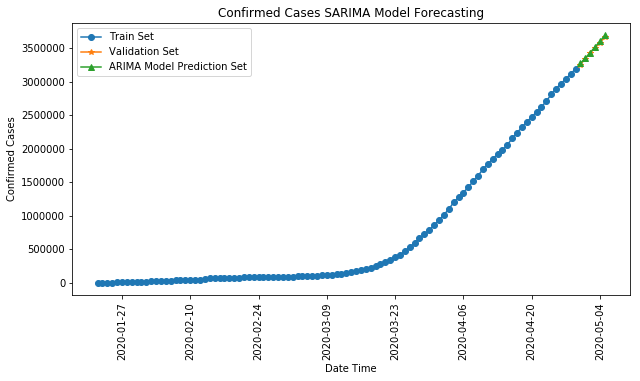

In [87]:
prediction_sarima=model_sarima.predict(len(valid))
y_pred["SARIMA Model Prediction"]=prediction_sarima

model_scores.append(np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["SARIMA Model Prediction"])))
print("Root Mean Square Error for SARIMA Model: ",np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["SARIMA Model Prediction"])))

plt.figure(figsize=(10,5))
plt.plot(model_train.index,model_train["Confirmed"],label="Train Set",marker='o')
plt.plot(valid.index,valid["Confirmed"],label="Validation Set",marker='*')
plt.plot(y_pred["SARIMA Model Prediction"],label="ARIMA Model Prediction Set",marker='^')
plt.legend()
plt.xlabel("Date Time")
plt.ylabel('Confirmed Cases')
plt.title("Confirmed Cases SARIMA Model Forecasting")
plt.xticks(rotation=90)

In [88]:
SARIMA_model_new_prediction=[]
for i in range(1,18):
    SARIMA_model_new_prediction.append(model_sarima.predict(len(valid)+i)[-1])
model_predictions["SARIMA Model Prediction"]=SARIMA_model_new_prediction
model_predictions.head()

,Dates,Linear Regression Prediction,Polynonmial Regression Prediction,Holt's Linear Model Prediction,Holt's Winter Model Prediction,AR Model Prediction,MA Model Prediction,ARIMA Model Prediction,SARIMA Model Prediction
0,2020-05-06,2329969.544704,3832944.588270,3760963.326319,3715049.458883,3785255.901300,3778949.005619,3720378.109266,3778949.005619
1,2020-05-07,2358814.439893,3935015.775463,3841154.558930,3791827.906411,3872806.364446,3868210.484755,3795924.134023,3868210.484755
2,2020-05-08,2387659.335081,4038383.003223,3921345.791541,3868609.323834,3961388.680490,3958888.209037,3872373.857752,3958888.209037
3,2020-05-09,2416504.230270,4143046.271549,4001537.024152,3945362.118336,4050636.079962,4050982.178463,3949727.280451,4050982.178463
4,2020-05-10,2445349.125459,4249005.580442,4081728.256763,4021003.555966,4140431.913120,4144492.393035,4027984.402121,4144492.393035


In [89]:
forecast_accuracy(y_pred["SARIMA Model Prediction"],y_pred["Confirmed"])  

{'mape': 0.004674093529342257,
 'me': 16345.283332294319,
 'mae': 16345.283332294319,
 'mpe': 0.004674093529342257,
 'rmse': 17725.259671844826,
 'corr': 0.9993977780468865,
 'minmax': 0.004649114436675039}

<h2>Facebook's Prophet Model for forecasting</h2>

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(y_test2_inverse[:],prediction2_inverse[:]))
print(f'test rmse {rmse}')

<h1>Add on Graph</h1>

In [9]:
china_data=covid[covid["Country/Region"]=="Mainland China"]
Italy_data=covid[covid["Country/Region"]=="Italy"]
US_data=covid[covid["Country/Region"]=="US"]
spain_data=covid[covid["Country/Region"]=="Spain"]
rest_of_world=covid[(covid["Country/Region"]!="Mainland China")&(covid["Country/Region"]!="Italy")&(covid["Country/Region"]!="US")&(covid["Country/Region"]!="Spain")]

datewise_china=china_data.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
datewise_Italy=Italy_data.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
datewise_US=US_data.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
datewise_Spain=spain_data.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
datewise_restofworld=rest_of_world.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})

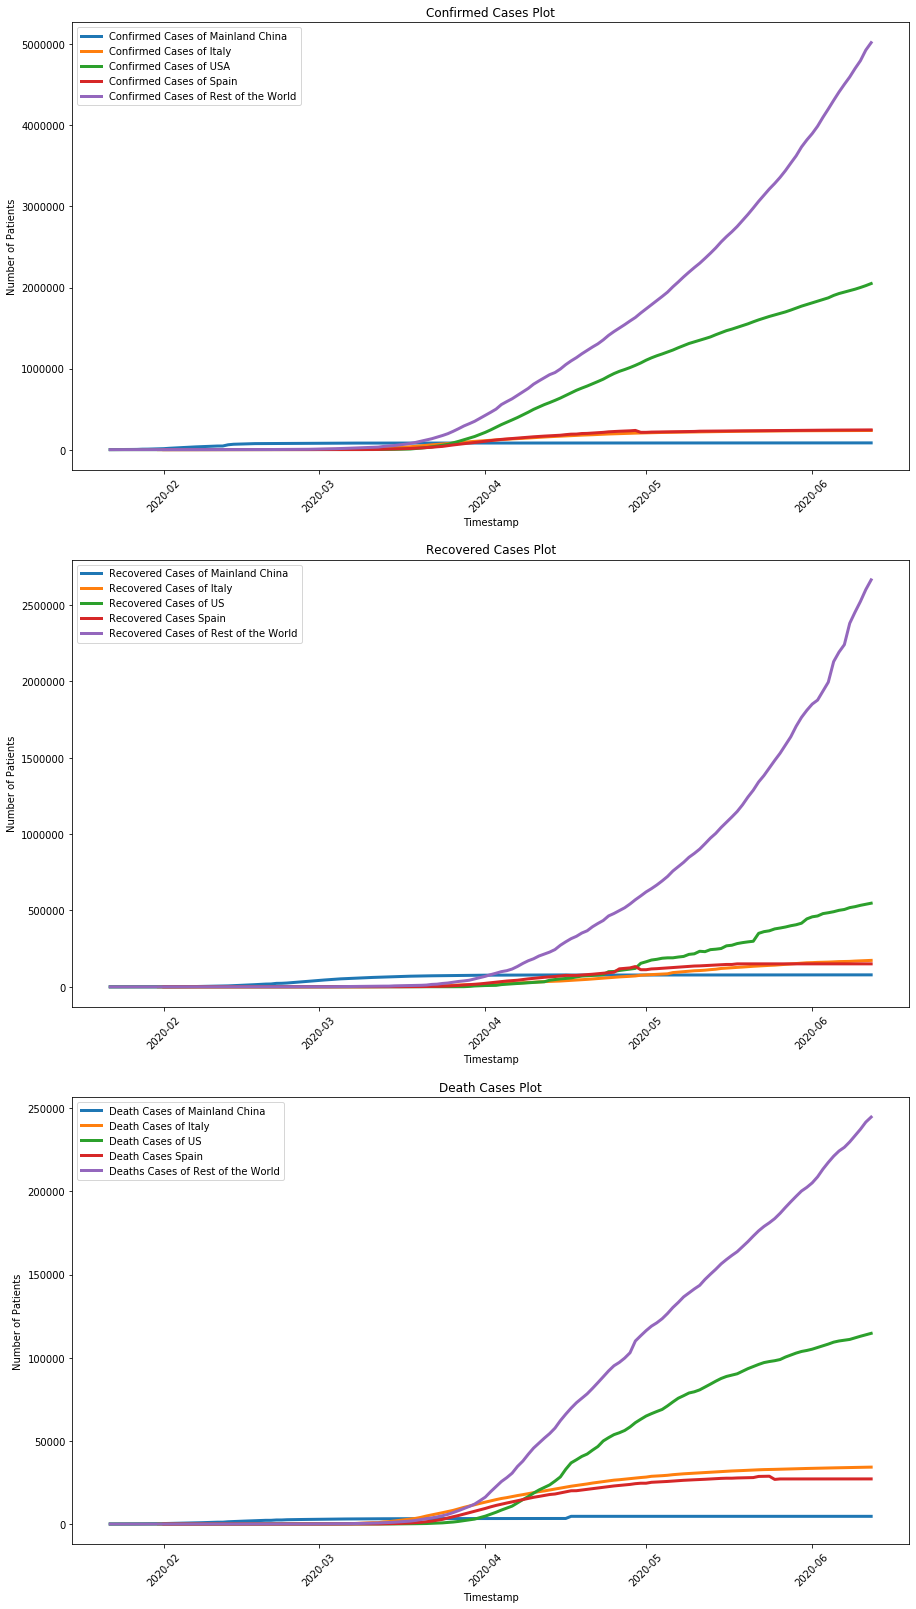

In [10]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1,figsize=(15,28))
ax1.plot(datewise_china["Confirmed"],label="Confirmed Cases of Mainland China",linewidth=3)
ax1.plot(datewise_Italy["Confirmed"],label="Confirmed Cases of Italy",linewidth=3)
ax1.plot(datewise_US["Confirmed"],label="Confirmed Cases of USA",linewidth=3)
ax1.plot(datewise_Spain["Confirmed"],label="Confirmed Cases of Spain",linewidth=3)
ax1.plot(datewise_restofworld["Confirmed"],label="Confirmed Cases of Rest of the World",linewidth=3)
ax1.set_title("Confirmed Cases Plot")
ax1.set_ylabel("Number of Patients")
ax1.set_xlabel("Timestamp")
ax1.legend()
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)
ax2.plot(datewise_china["Recovered"],label="Recovered Cases of Mainland China",linewidth=3)
ax2.plot(datewise_Italy["Recovered"],label="Recovered Cases of Italy",linewidth=3)
ax2.plot(datewise_US["Recovered"],label="Recovered Cases of US",linewidth=3)
ax2.plot(datewise_Spain["Recovered"],label="Recovered Cases Spain",linewidth=3)
ax2.plot(datewise_restofworld["Recovered"],label="Recovered Cases of Rest of the World",linewidth=3)
ax2.set_title("Recovered Cases Plot")
ax2.set_ylabel("Number of Patients")
ax2.set_xlabel("Timestamp")
ax2.legend()
for tick in ax2.get_xticklabels():
    tick.set_rotation(45)
ax3.plot(datewise_china["Deaths"],label='Death Cases of Mainland China',linewidth=3)
ax3.plot(datewise_Italy["Deaths"],label='Death Cases of Italy',linewidth=3)
ax3.plot(datewise_US["Deaths"],label='Death Cases of US',linewidth=3)
ax3.plot(datewise_Spain["Deaths"],label='Death Cases Spain',linewidth=3)
ax3.plot(datewise_restofworld["Deaths"],label="Deaths Cases of Rest of the World",linewidth=3)
ax3.set_title("Death Cases Plot")
ax3.set_ylabel("Number of Patients")
ax3.set_xlabel("Timestamp")
ax3.legend()
for tick in ax3.get_xticklabels():
    tick.set_rotation(45)

China has been able to "flatten the curve" looking at their graphs of Confirmed and Death Cases. With staggering Recovery Rate.
US seems to have good control on Deaths, but number of people getting affected is going way out of hand.

In [11]:
datewise_china["Mortality"]=(datewise_china["Deaths"]/datewise_china["Confirmed"])*100
datewise_Italy["Mortality"]=(datewise_Italy["Deaths"]/datewise_Italy["Confirmed"])*100
datewise_US["Mortality"]=(datewise_US["Deaths"]/datewise_US["Confirmed"])*100
datewise_Spain["Mortality"]=(datewise_Spain["Deaths"]/datewise_Spain["Confirmed"])*100
datewise_restofworld["Mortality"]=(datewise_restofworld["Deaths"]/datewise_restofworld["Confirmed"])*100

datewise_china["Recovery"]=(datewise_china["Recovered"]/datewise_china["Confirmed"])*100
datewise_Italy["Recovery"]=(datewise_Italy["Recovered"]/datewise_Italy["Confirmed"])*100
datewise_US["Recovery"]=(datewise_US["Recovered"]/datewise_US["Confirmed"])*100
datewise_Spain["Recovery"]=(datewise_Spain["Recovered"]/datewise_Spain["Confirmed"])*100
datewise_restofworld["Recovery"]=(datewise_restofworld["Recovered"]/datewise_restofworld["Confirmed"])*100

In [12]:
print(datewise_china["Recovery"].iloc[-1])
print(datewise_US["Recovery"].iloc[-1]) 
print(datewise_Spain["Recovery"].iloc[-1])
print(datewise_restofworld["Recovery"].iloc[-1])
datewise_Italy["Recovery"].iloc[-1]

94.3328317785134
26.714970234057233
61.82994872722638
53.05601598971725


73.24643998222636

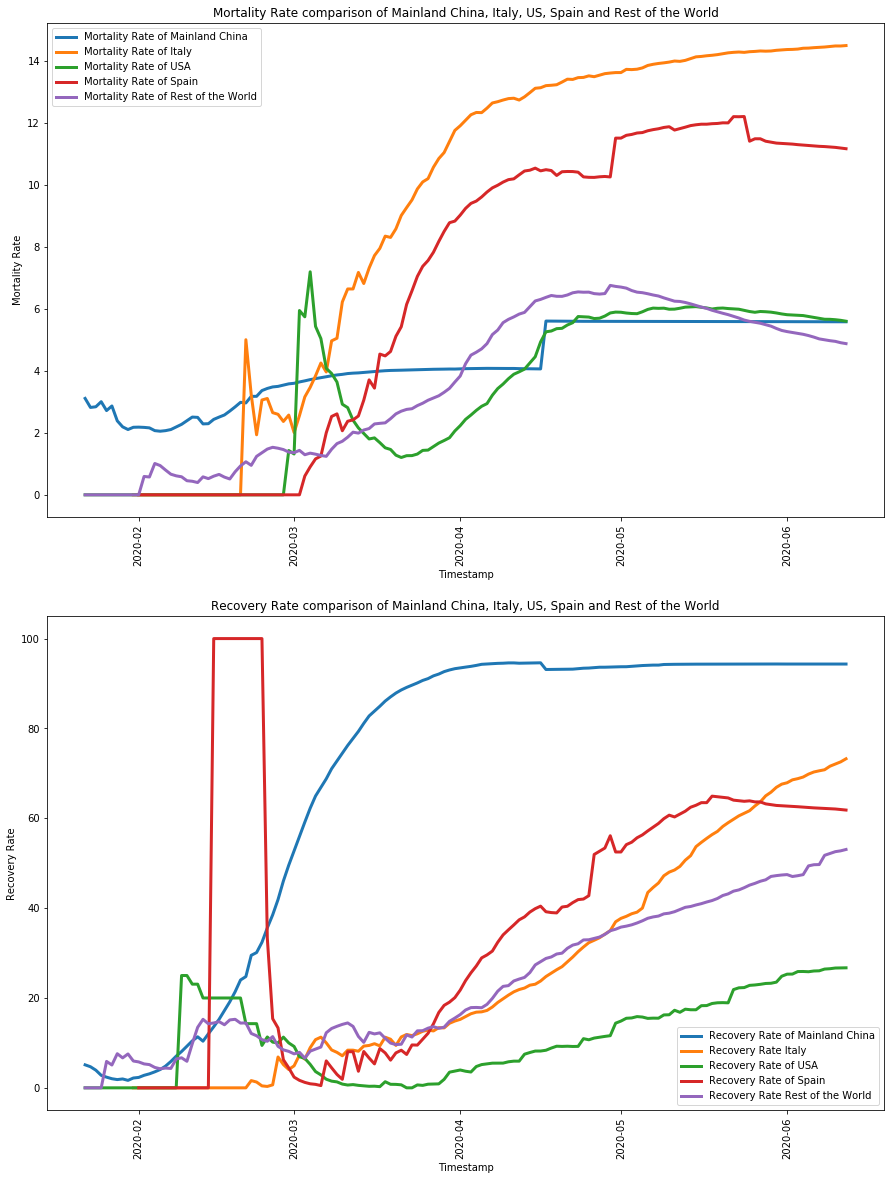

In [13]:
fig, (ax1,ax2) = plt.subplots(2, 1,figsize=(15,20))
ax1.plot(datewise_china["Mortality"],label="Mortality Rate of Mainland China",linewidth=3)
ax1.plot(datewise_Italy["Mortality"],label="Mortality Rate of Italy",linewidth=3)
ax1.plot(datewise_US["Mortality"],label="Mortality Rate of USA",linewidth=3)
ax1.plot(datewise_Spain["Mortality"],label="Mortality Rate of Spain",linewidth=3)
ax1.plot(datewise_restofworld["Mortality"],label="Mortality Rate of Rest of the World",linewidth=3)
ax1.set_ylabel("Mortality Rate")
ax1.set_xlabel("Timestamp")
ax1.set_title("Mortality Rate comparison of Mainland China, Italy, US, Spain and Rest of the World")
ax1.legend()
for tick in ax1.get_xticklabels():
    tick.set_rotation(90)
ax2.plot(datewise_china["Recovery"],label="Recovery Rate of Mainland China",linewidth=3)
ax2.plot(datewise_Italy["Recovery"],label="Recovery Rate Italy",linewidth=3)
ax2.plot(datewise_US["Recovery"],label="Recovery Rate of USA",linewidth=3)
ax2.plot(datewise_Spain["Recovery"],label="Recovery Rate of Spain",linewidth=3)
ax2.plot(datewise_restofworld["Recovery"],label="Recovery Rate Rest of the World",linewidth=3)
ax2.set_ylabel("Recovery Rate")
ax2.set_xlabel("Timestamp")
ax2.set_title("Recovery Rate comparison of Mainland China, Italy, US, Spain and Rest of the World")
ax2.legend()
for tick in ax2.get_xticklabels():
    tick.set_rotation(90)

aking off Recovery Rate of Spain is a good sign but it's nowhere in comparison to the Moratality Rate. Its alarming sign for USA as Recovery Rate is dropping down with Mortality Rate taking off

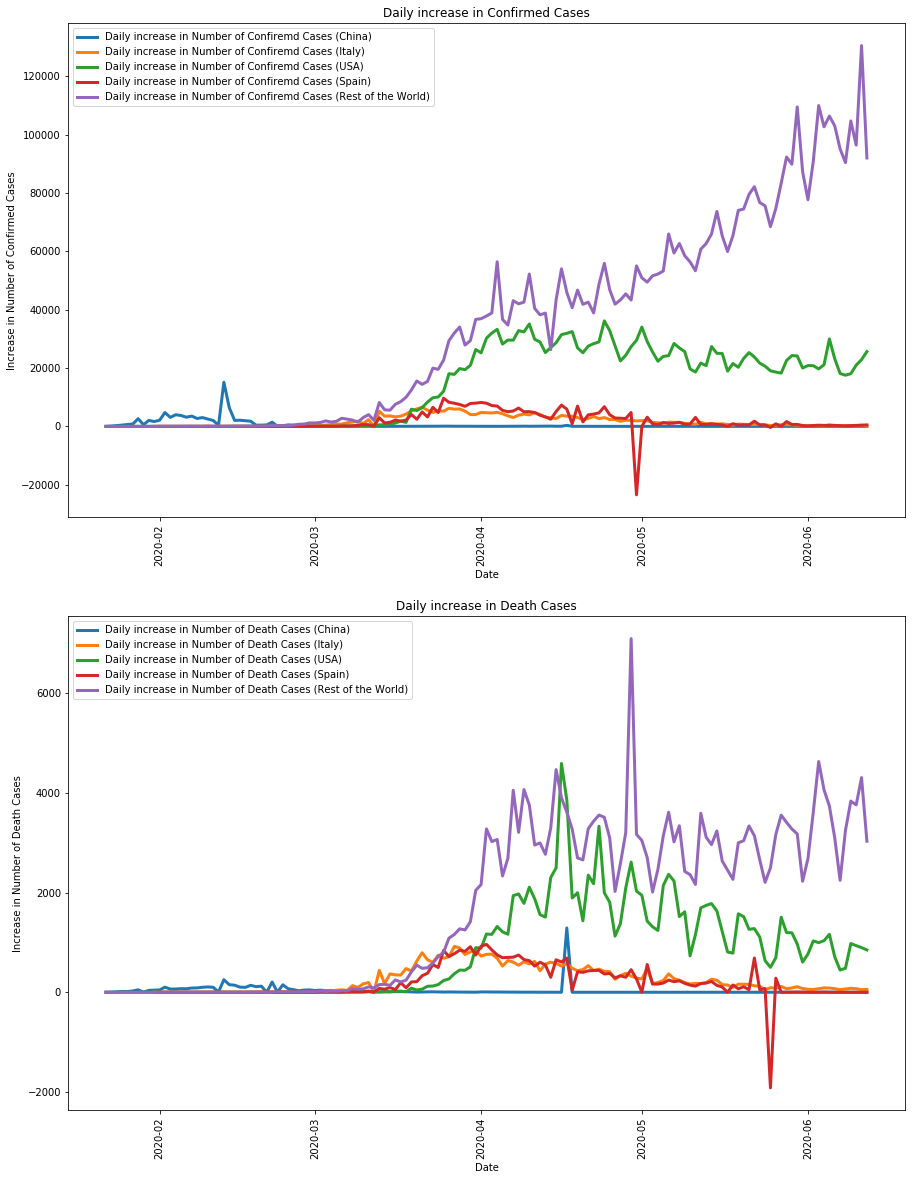

In [14]:
fig, (ax1,ax2) = plt.subplots(2, 1,figsize=(15,20))
ax1.plot(datewise_china["Confirmed"].diff().fillna(0),label='Daily increase in Number of Confiremd Cases (China)',linewidth=3)
ax1.plot(datewise_Italy["Confirmed"].diff().fillna(0),label='Daily increase in Number of Confiremd Cases (Italy)',linewidth=3)
ax1.plot(datewise_US["Confirmed"].diff().fillna(0),label='Daily increase in Number of Confiremd Cases (USA)',linewidth=3)
ax1.plot(datewise_Spain["Confirmed"].diff().fillna(0),label='Daily increase in Number of Confiremd Cases (Spain)',linewidth=3)
ax1.plot(datewise_restofworld["Confirmed"].diff().fillna(0),label='Daily increase in Number of Confiremd Cases (Rest of the World)',linewidth=3)
ax1.set_xlabel('Date')
ax1.set_ylabel("Increase in Number of Confirmed Cases")
ax1.set_title("Daily increase in Confirmed Cases")
ax1.legend()
for tick in ax1.get_xticklabels():
    tick.set_rotation(90)
ax2.plot(datewise_china["Deaths"].diff().fillna(0),label='Daily increase in Number of Death Cases (China)',linewidth=3)
ax2.plot(datewise_Italy["Deaths"].diff().fillna(0),label='Daily increase in Number of Death Cases (Italy)',linewidth=3)
ax2.plot(datewise_US["Deaths"].diff().fillna(0),label='Daily increase in Number of Death Cases (USA)',linewidth=3)
ax2.plot(datewise_Spain["Deaths"].diff().fillna(0),label='Daily increase in Number of Death Cases (Spain)',linewidth=3)
ax2.plot(datewise_restofworld["Deaths"].diff().fillna(0),label='Daily increase in Number of Death Cases (Rest of the World)',linewidth=3)
ax2.set_xlabel('Date')
ax2.set_ylabel("Increase in Number of Death Cases")
ax2.set_title("Daily increase in Death Cases")
ax2.legend()
for tick in ax2.get_xticklabels():
    tick.set_rotation(90)

In [15]:
print(datewise_china["Confirmed"].iloc[-])
print(datewise_US["Confirmed"].iloc[-1]) 
print(datewise_Spain["Confirmed"].iloc[-1])
print(datewise_restofworld["Confirmed"].iloc[-1])
datewise_Italy["Confirmed"].iloc[-1]

SyntaxError: invalid syntax (<ipython-input-15-e60e0e6e60ba>, line 1)

In [16]:
print(datewise_china["Deaths"].tail(20))

ObservationDate
2020-05-24    4634.0
2020-05-25    4634.0
2020-05-26    4634.0
2020-05-27    4634.0
2020-05-28    4634.0
2020-05-29    4634.0
2020-05-30    4634.0
2020-05-31    4634.0
2020-06-01    4634.0
2020-06-02    4634.0
2020-06-03    4634.0
2020-06-04    4634.0
2020-06-05    4634.0
2020-06-06    4634.0
2020-06-07    4634.0
2020-06-08    4634.0
2020-06-09    4634.0
2020-06-10    4634.0
2020-06-11    4634.0
2020-06-12    4634.0
Name: Deaths, dtype: float64


In [17]:
cluster_summary.to_csv('G:/covid/prt.csv')

NameError: name 'cluster_summary' is not defined

In [ ]:
arr=[1,2,3,2,5]
cnt=0
r_t